# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:100%; font-family:'Times New Roman'; background-color:purple; overflow:hidden"><b>Import libraries and load data</b></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

t20_wc_batting_summary = pd.read_json('/kaggle/input/cricket-analysis-dataset/t20_wc_batting_summary.json')
t20_wc_bowling_summary = pd.read_json('/kaggle/input/cricket-analysis-dataset/t20_wc_bowling_summary.json')
t20_wc_match_results = pd.read_json('/kaggle/input/cricket-analysis-dataset/t20_wc_match_results.json')
t20_wc_player_info = pd.read_json('/kaggle/input/cricket-analysis-dataset/t20_wc_player_info.json')

print("Batting Summary:")
print(t20_wc_batting_summary.info())
print("\nBowling Summary:")
print(t20_wc_bowling_summary.info())
print("\nMatch Results:")
print(t20_wc_match_results.info())
print("\nPlayer Info:")
print(t20_wc_player_info.info())


Batting Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   battingSummary  45 non-null     object
dtypes: object(1)
memory usage: 488.0+ bytes
None

Bowling Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bowlingSummary  45 non-null     object
dtypes: object(1)
memory usage: 488.0+ bytes
None

Match Results:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   matchSummary  1 non-null      object
dtypes: object(1)
memory usage: 136.0+ bytes
None

Player Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total

In [2]:
df_batting = pd.read_csv('/kaggle/input/cricket-analysis-dataset/df_batting.csv')
df_bowling = pd.read_csv('/kaggle/input/cricket-analysis-dataset/df_bowling.csv')
df_match = pd.read_csv('/kaggle/input/cricket-analysis-dataset/df_match.csv')
df_players = pd.read_csv('/kaggle/input/cricket-analysis-dataset/df_players.csv')

print("Batting Summary:")
print(df_batting.info())
print(df_batting.isnull().sum())

print("\nBowling Summary:")
print(df_bowling.info())
print(df_batting.isnull().sum())

print("\nMatch Details:")
print(df_match.info())
print(df_batting.isnull().sum())

print("\nPlayer Info:")
print(df_players.info())
print(df_batting.isnull().sum())


Batting Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match        699 non-null    object
 1   teamInnings  699 non-null    object
 2   battingPos   699 non-null    int64 
 3   batsmanName  699 non-null    object
 4   runs         699 non-null    int64 
 5   balls        699 non-null    int64 
 6   4s           699 non-null    int64 
 7   6s           699 non-null    int64 
 8   SR           699 non-null    object
 9   out/not_out  699 non-null    object
 10  match_id     699 non-null    object
dtypes: int64(5), object(6)
memory usage: 60.2+ KB
None
match          0
teamInnings    0
battingPos     0
batsmanName    0
runs           0
balls          0
4s             0
6s             0
SR             0
out/not_out    0
match_id       0
dtype: int64

Bowling Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499

In [3]:
df_batting_summary = pd.DataFrame(t20_wc_batting_summary)
df_bowling_summary = pd.DataFrame(t20_wc_bowling_summary)
df_match_results = pd.DataFrame(t20_wc_match_results)
df_player_info_json = pd.DataFrame(t20_wc_player_info)


In [4]:
print("Batting Summary JSON Columns:", df_batting_summary.columns)
print("Bowling Summary JSON Columns:", df_bowling_summary.columns)
print("Match Results JSON Columns:", df_match_results.columns)
print("Player Info JSON Columns:", df_player_info_json.columns)

Batting Summary JSON Columns: Index(['battingSummary'], dtype='object')
Bowling Summary JSON Columns: Index(['bowlingSummary'], dtype='object')
Match Results JSON Columns: Index(['matchSummary'], dtype='object')
Player Info JSON Columns: Index(['name', 'team', 'battingStyle', 'bowlingStyle', 'playingRole',
       'description'],
      dtype='object')


In [5]:
df_batting['match_id'] = df_batting['match_id'].astype(str)
df_bowling['match_id'] = df_bowling['match_id'].astype(str)
df_match['match_id'] = df_match['match_id'].astype(str)

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:100%; font-family:'Times New Roman'; background-color:purple; overflow:hidden"><b>EDA</b></div>

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:100%; font-family:'Times New Roman'; background-color:purple; overflow:hidden"><b>Batting Performance</b></div>

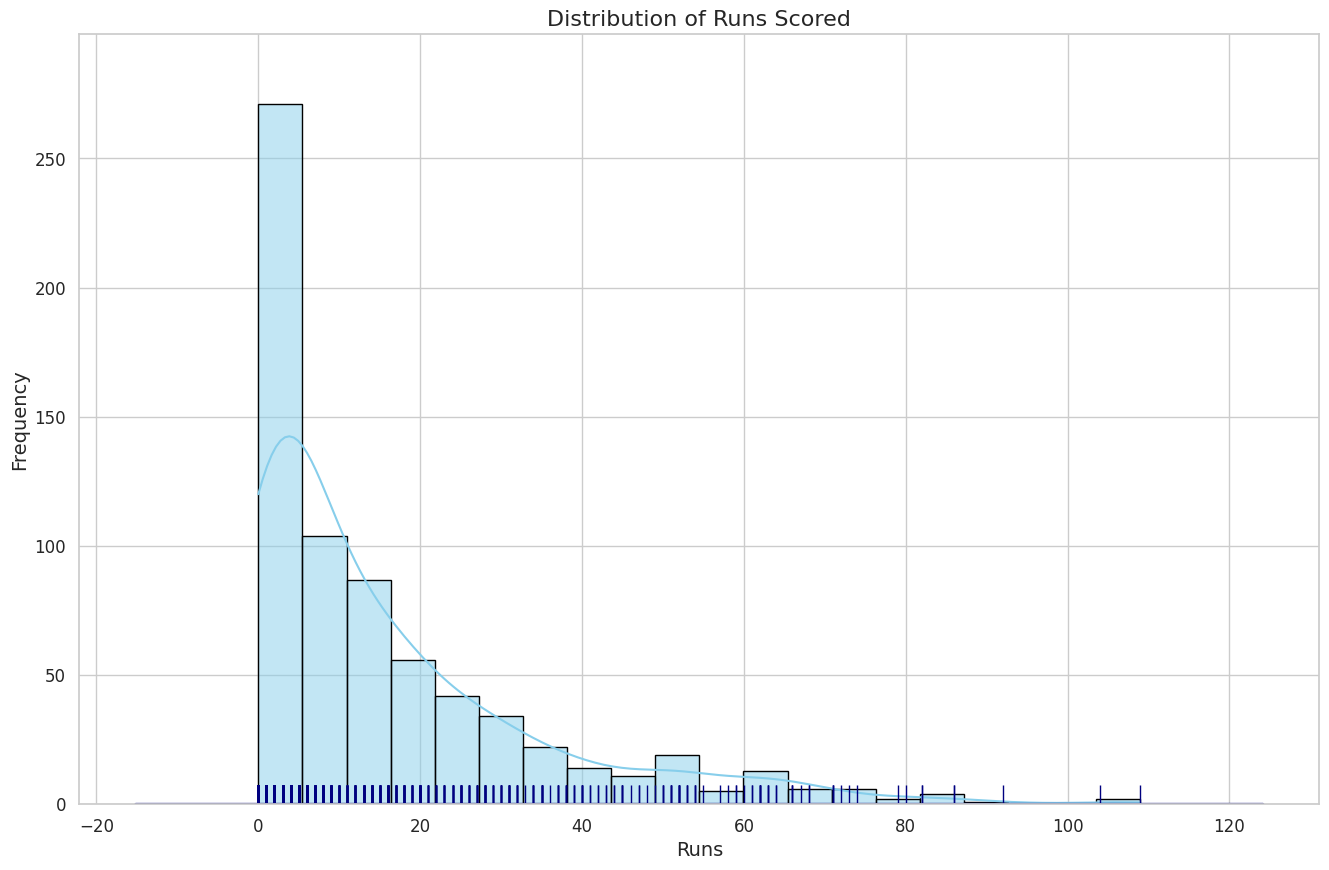

In [6]:
sns.set(style="whitegrid")
sns.set_palette("muted")
plt.figure(figsize=(16, 10))
sns.histplot(df_batting['runs'], kde=True, bins=20, color="skyblue", edgecolor="black")
sns.kdeplot(df_batting['runs'], color="navy", lw=2)
sns.rugplot(df_batting['runs'], color="navy")
plt.title('Distribution of Runs Scored', fontsize=16)
plt.xlabel('Runs', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Text(0.5, 1.0, 'Strike Rate Distribution')

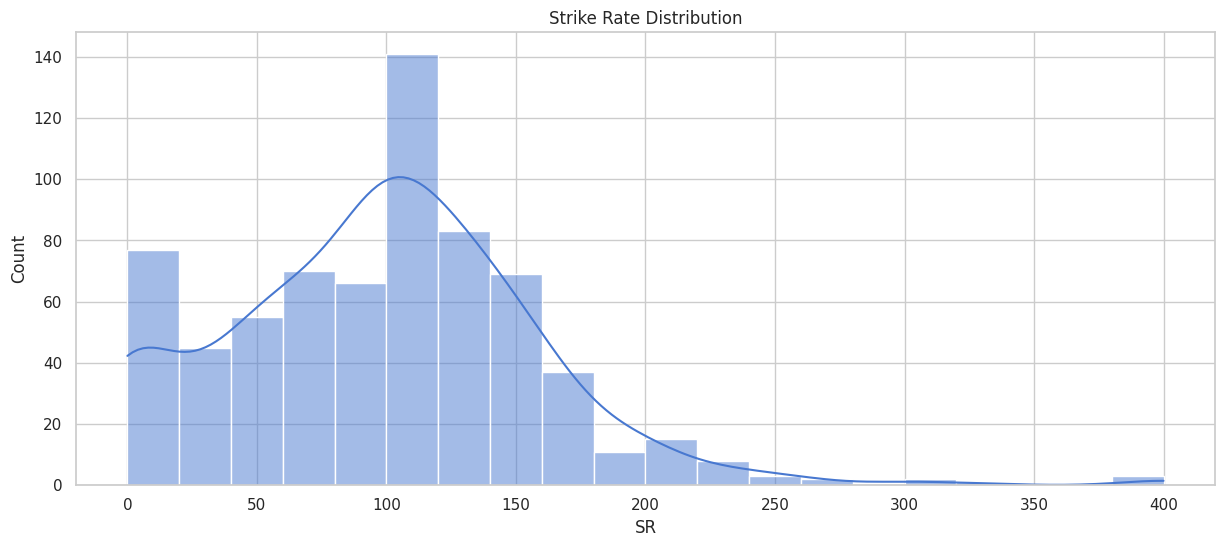

In [7]:
plt.figure(figsize=(50, 20))
plt.subplot(3, 3, 2)
sns.histplot(pd.to_numeric(df_batting['SR'], errors='coerce'), kde=True, bins=20)
plt.title('Strike Rate Distribution')

Text(0.5, 1.0, 'Top Batsmen by Runs Scored')

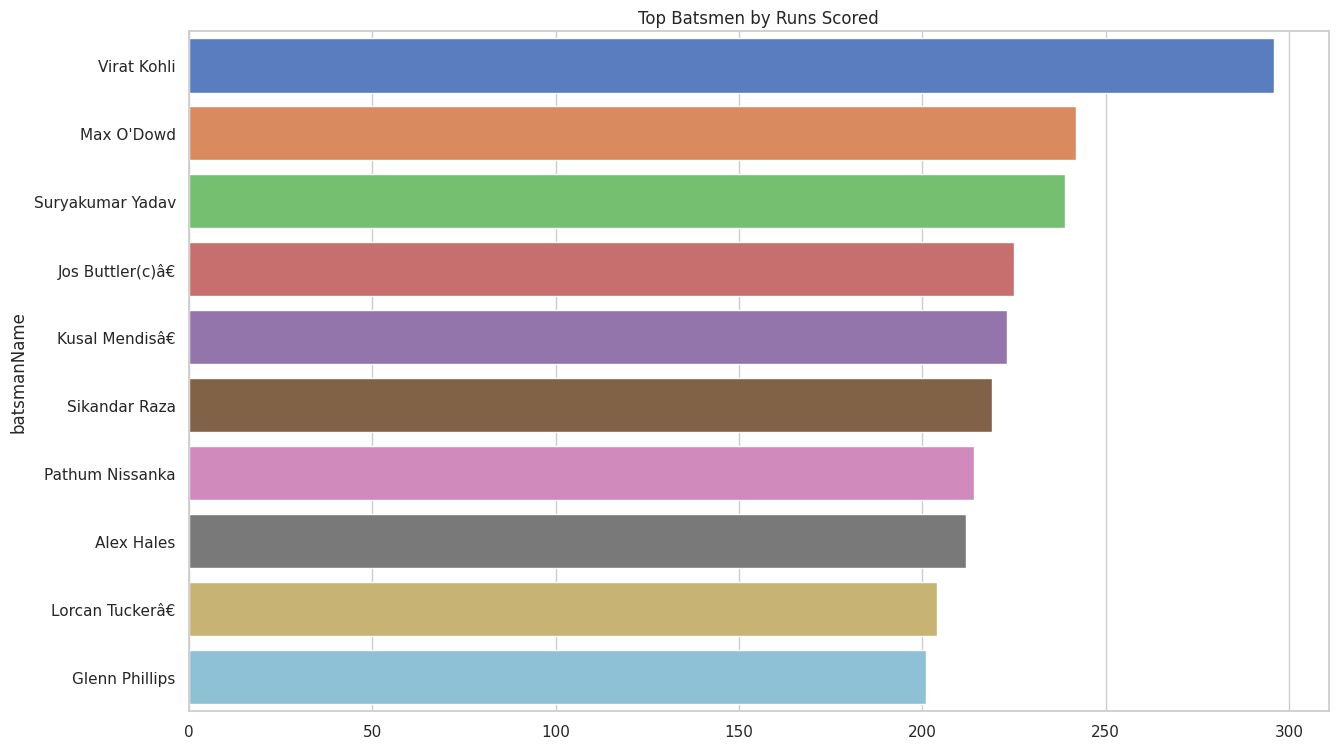

In [8]:
plt.figure(figsize=(50, 30))
top_batsmen = df_batting.groupby('batsmanName')['runs'].sum().sort_values(ascending=False).head(10)
plt.subplot(3, 3, 3)
sns.barplot(x=top_batsmen.values, y=top_batsmen.index)
plt.title('Top Batsmen by Runs Scored')

Text(0.5, 1.0, 'Distribution of 4s Hit')

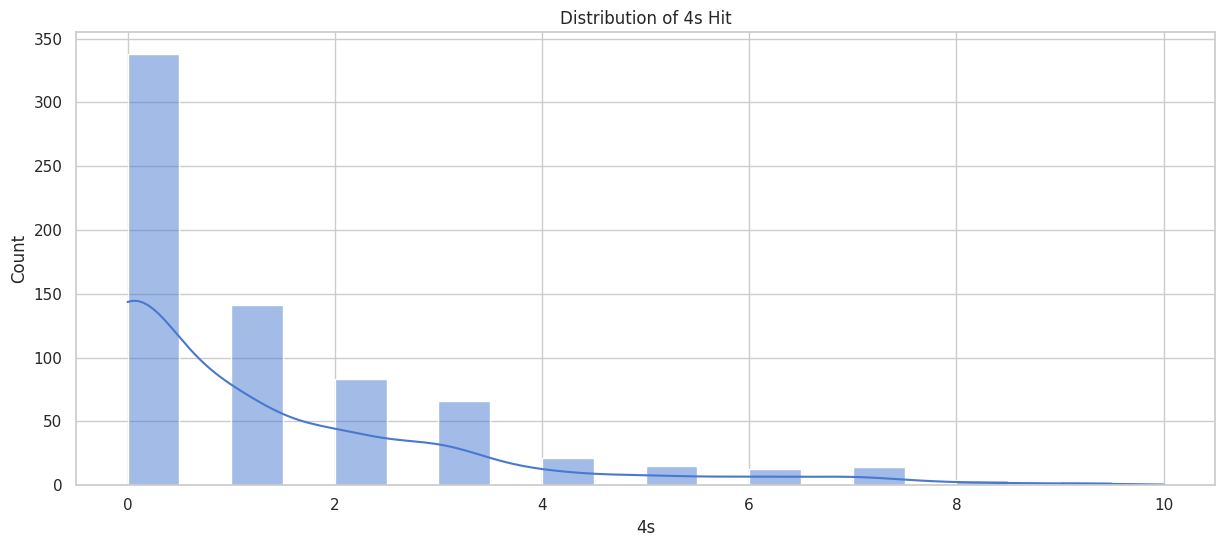

In [9]:
plt.figure(figsize=(50, 20))
plt.subplot(3, 3, 4)
sns.histplot(df_batting['4s'], kde=True, bins=20)
plt.title('Distribution of 4s Hit')

Text(0.5, 1.0, 'Distribution of 6s Hit')

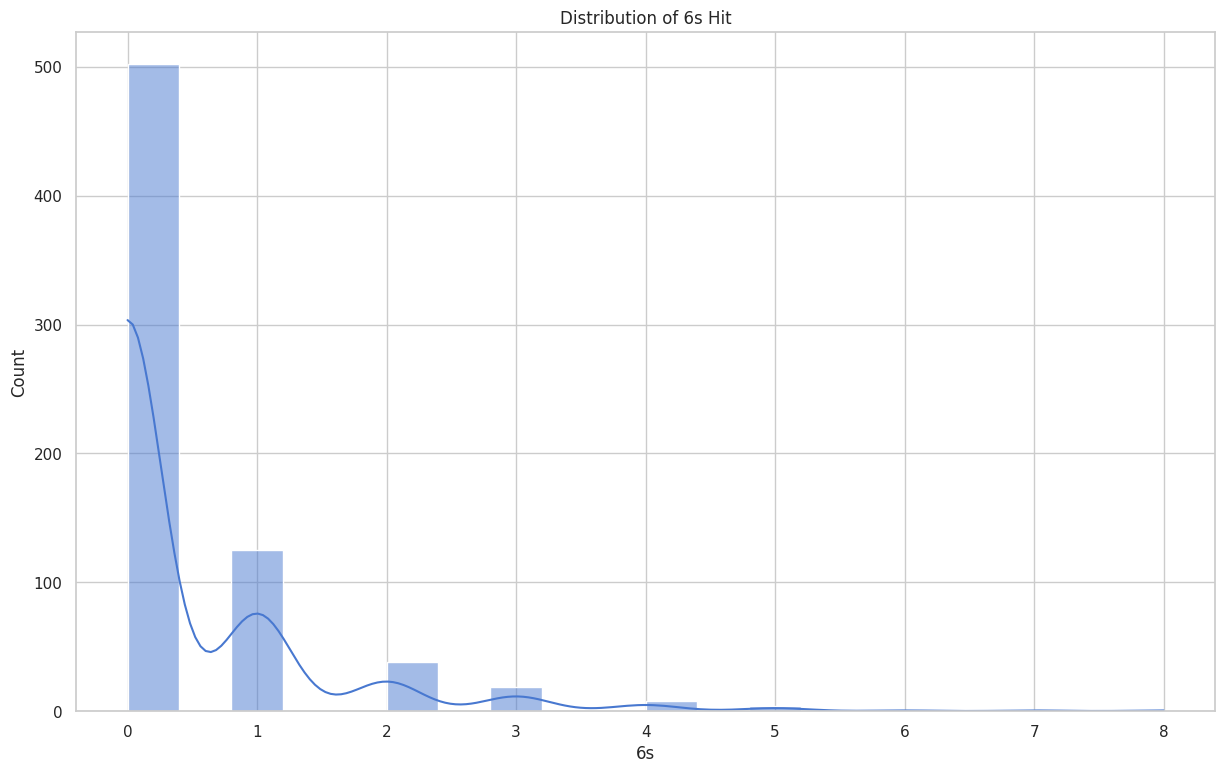

In [10]:
plt.figure(figsize=(50, 30))
plt.subplot(3, 3, 5)
sns.histplot(df_batting['6s'], kde=True, bins=20)
plt.title('Distribution of 6s Hit')

Text(0.5, 1.0, 'Runs Scored by Batting Position')

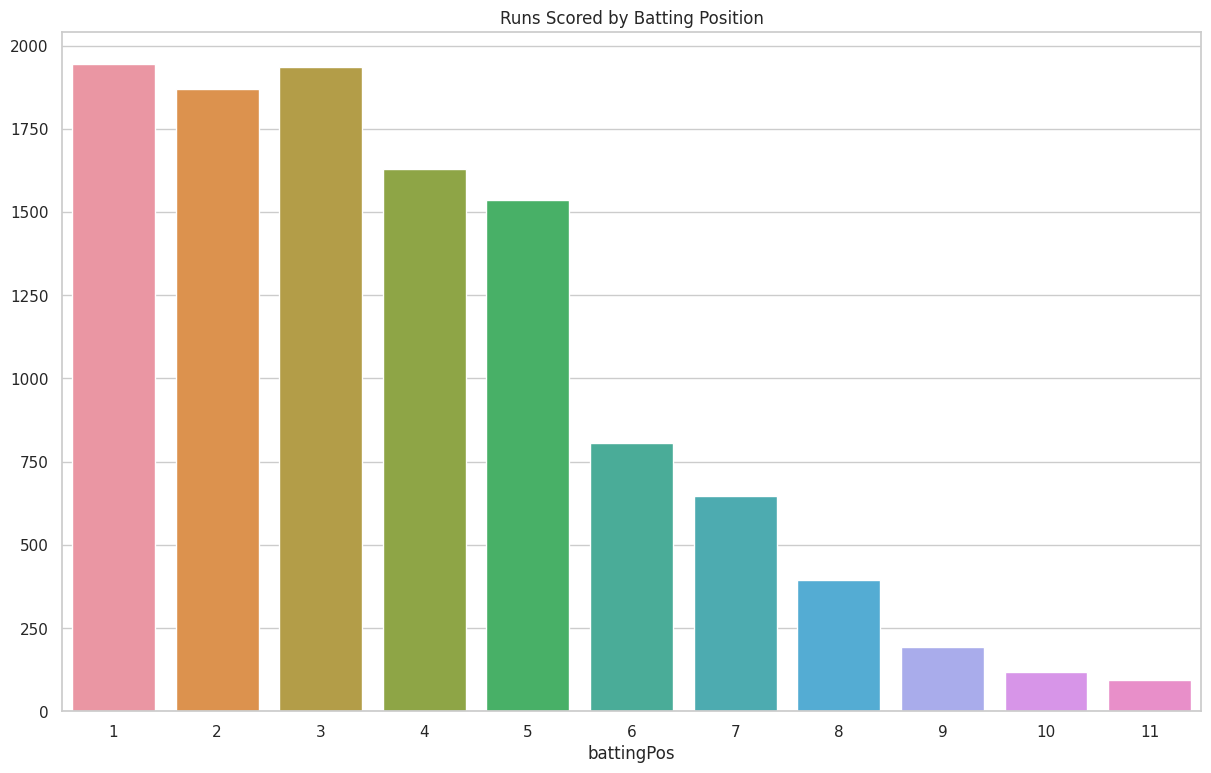

In [11]:
plt.figure(figsize=(50, 30))
batting_pos_runs = df_batting.groupby('battingPos')['runs'].sum().sort_values(ascending=False)
plt.subplot(3, 3, 6)
sns.barplot(x=batting_pos_runs.index, y=batting_pos_runs.values)
plt.title('Runs Scored by Batting Position')

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:100%; font-family:'Times New Roman'; background-color:purple; overflow:hidden"><b>Bowling Performance</b></div>

Text(0.5, 1.0, 'Distribution of Wickets Taken')

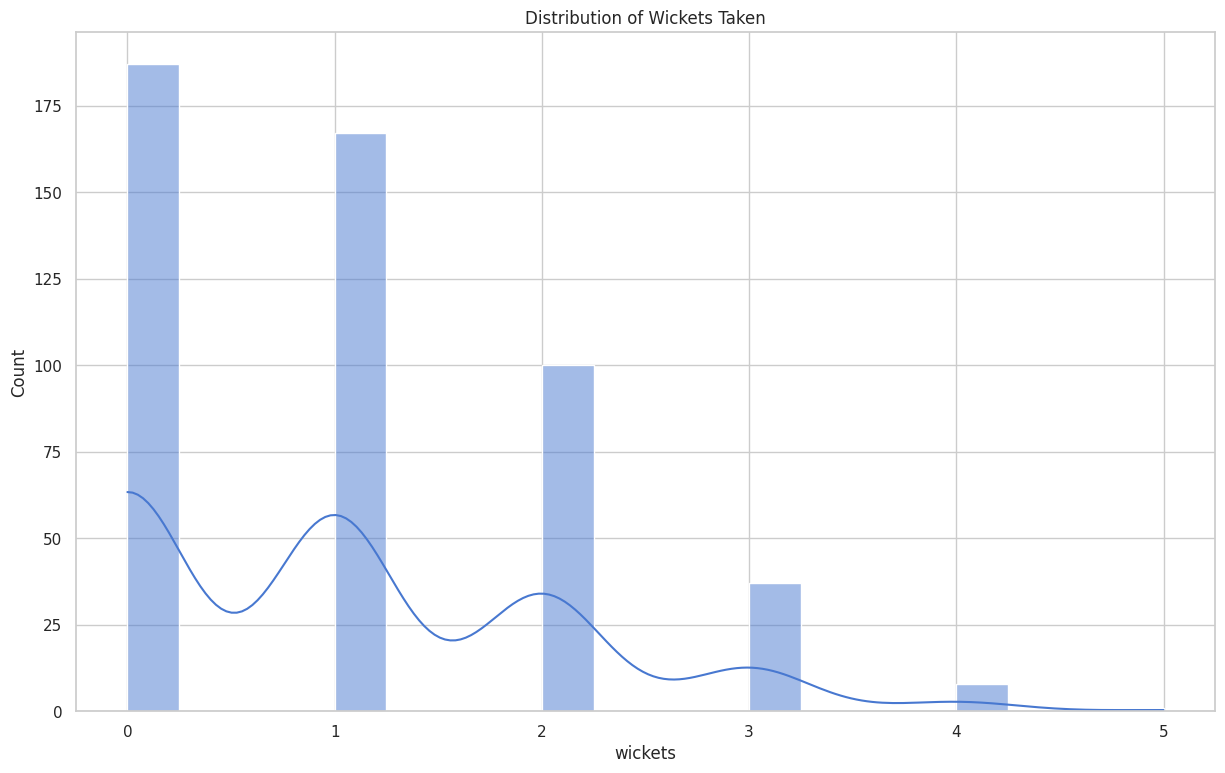

In [12]:
plt.figure(figsize=(50, 30))
plt.subplot(3, 3, 7)
sns.histplot(df_bowling['wickets'], kde=True, bins=20)
plt.title('Distribution of Wickets Taken')


Text(0.5, 1.0, 'Economy Rate Distribution')

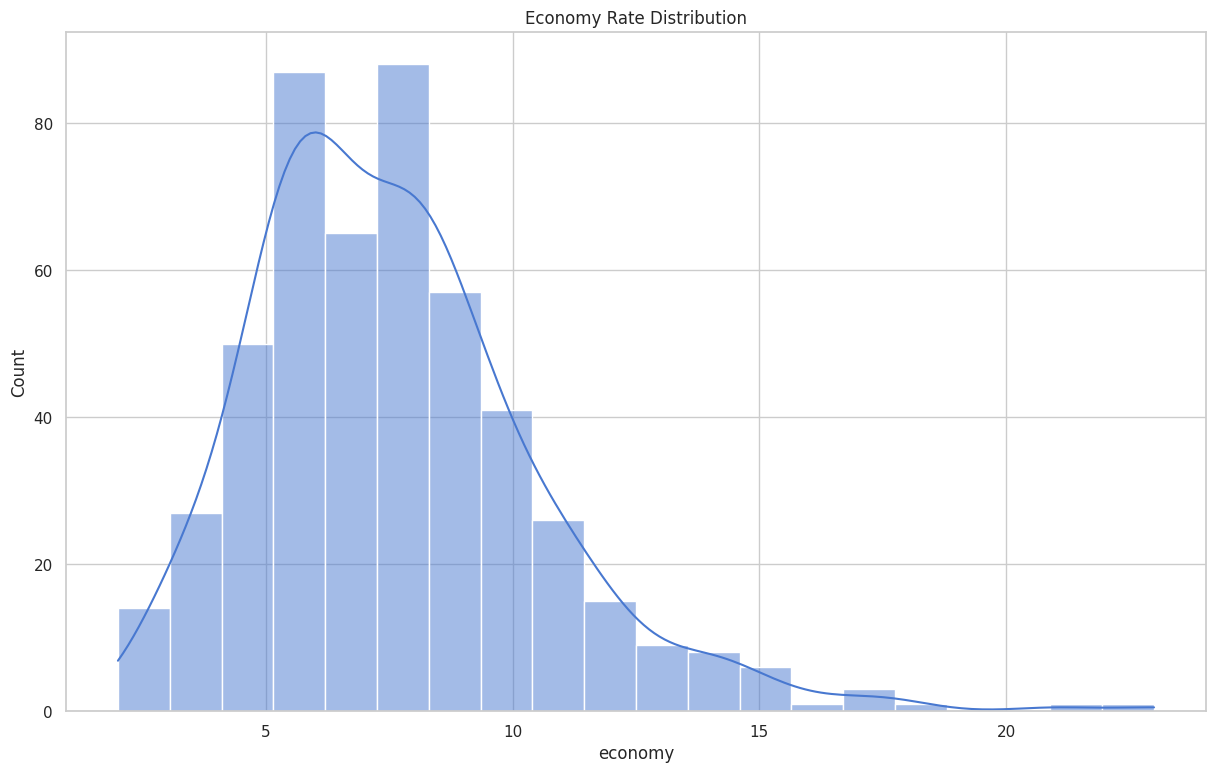

In [13]:
plt.figure(figsize=(50, 30))
plt.subplot(3, 3, 8)
sns.histplot(df_bowling['economy'], kde=True, bins=20)
plt.title('Economy Rate Distribution')

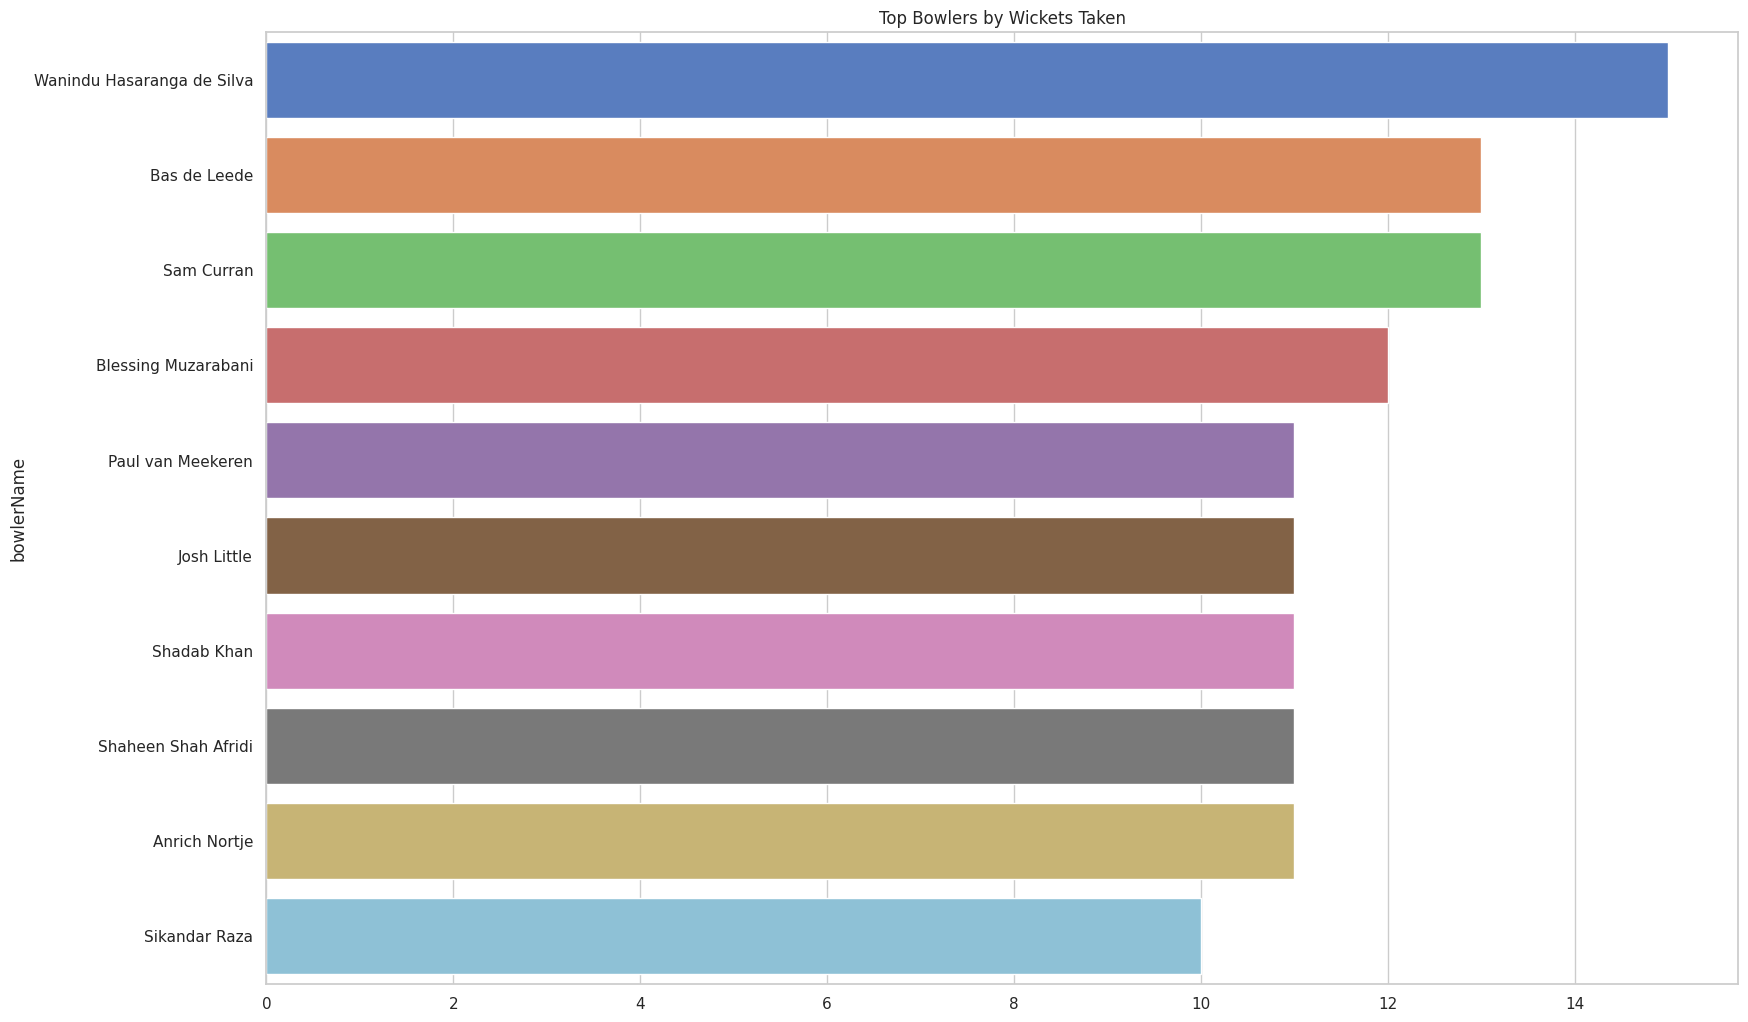

In [14]:
plt.figure(figsize=(50, 30))

top_bowlers = df_bowling.groupby('bowlerName')['wickets'].sum().sort_values(ascending=False).head(10)
plt.subplot(3, 3, 9)
sns.barplot(x=top_bowlers.values, y=top_bowlers.index)
plt.title('Top Bowlers by Wickets Taken')

plt.tight_layout()
plt.show()


<Figure size 5000x3000 with 0 Axes>

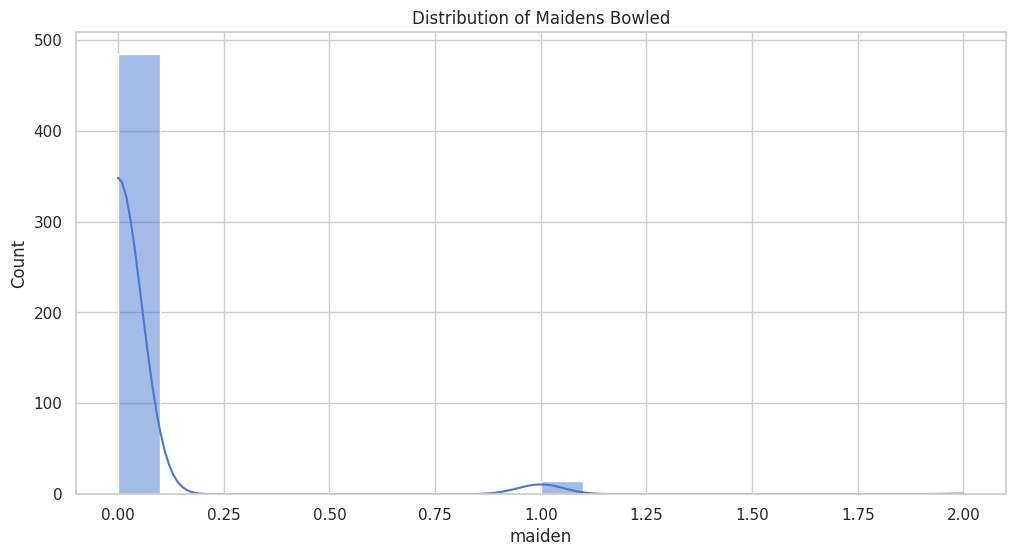

In [15]:
plt.figure(figsize=(50, 30))
plt.figure(figsize=(12, 6))
sns.histplot(df_bowling['maiden'], kde=True, bins=20)
plt.title('Distribution of Maidens Bowled')
plt.show()

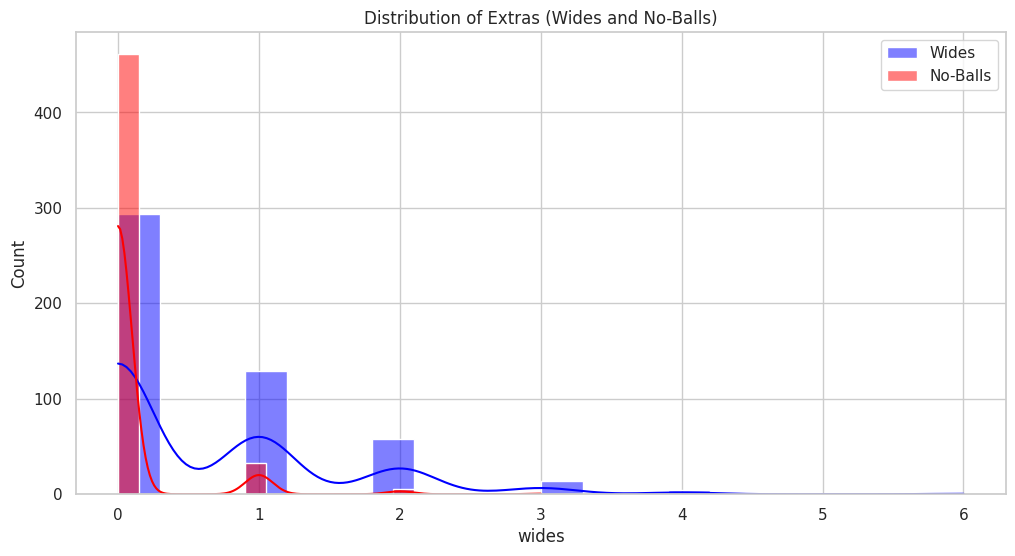

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df_bowling['wides'], kde=True, color='blue', label='Wides', bins=20)
sns.histplot(df_bowling['noBalls'], kde=True, color='red', label='No-Balls', bins=20)
plt.title('Distribution of Extras (Wides and No-Balls)')
plt.legend()
plt.show()

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:100%; font-family:'Times New Roman'; background-color:purple; overflow:hidden"><b>Match Analysis</b></div>

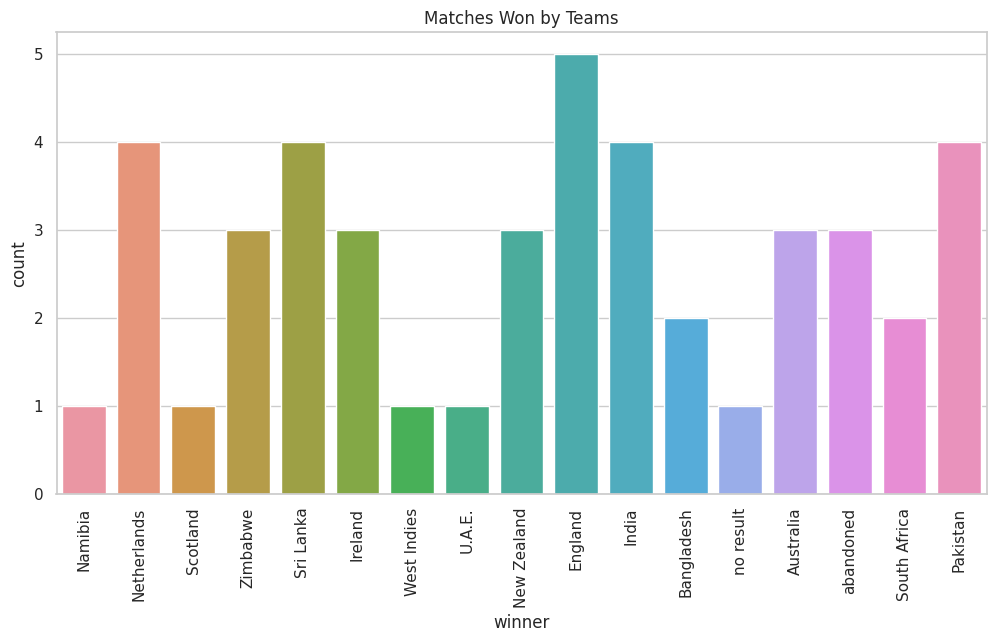

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_match, x='winner')
plt.title('Matches Won by Teams')
plt.xticks(rotation=90)
plt.show()


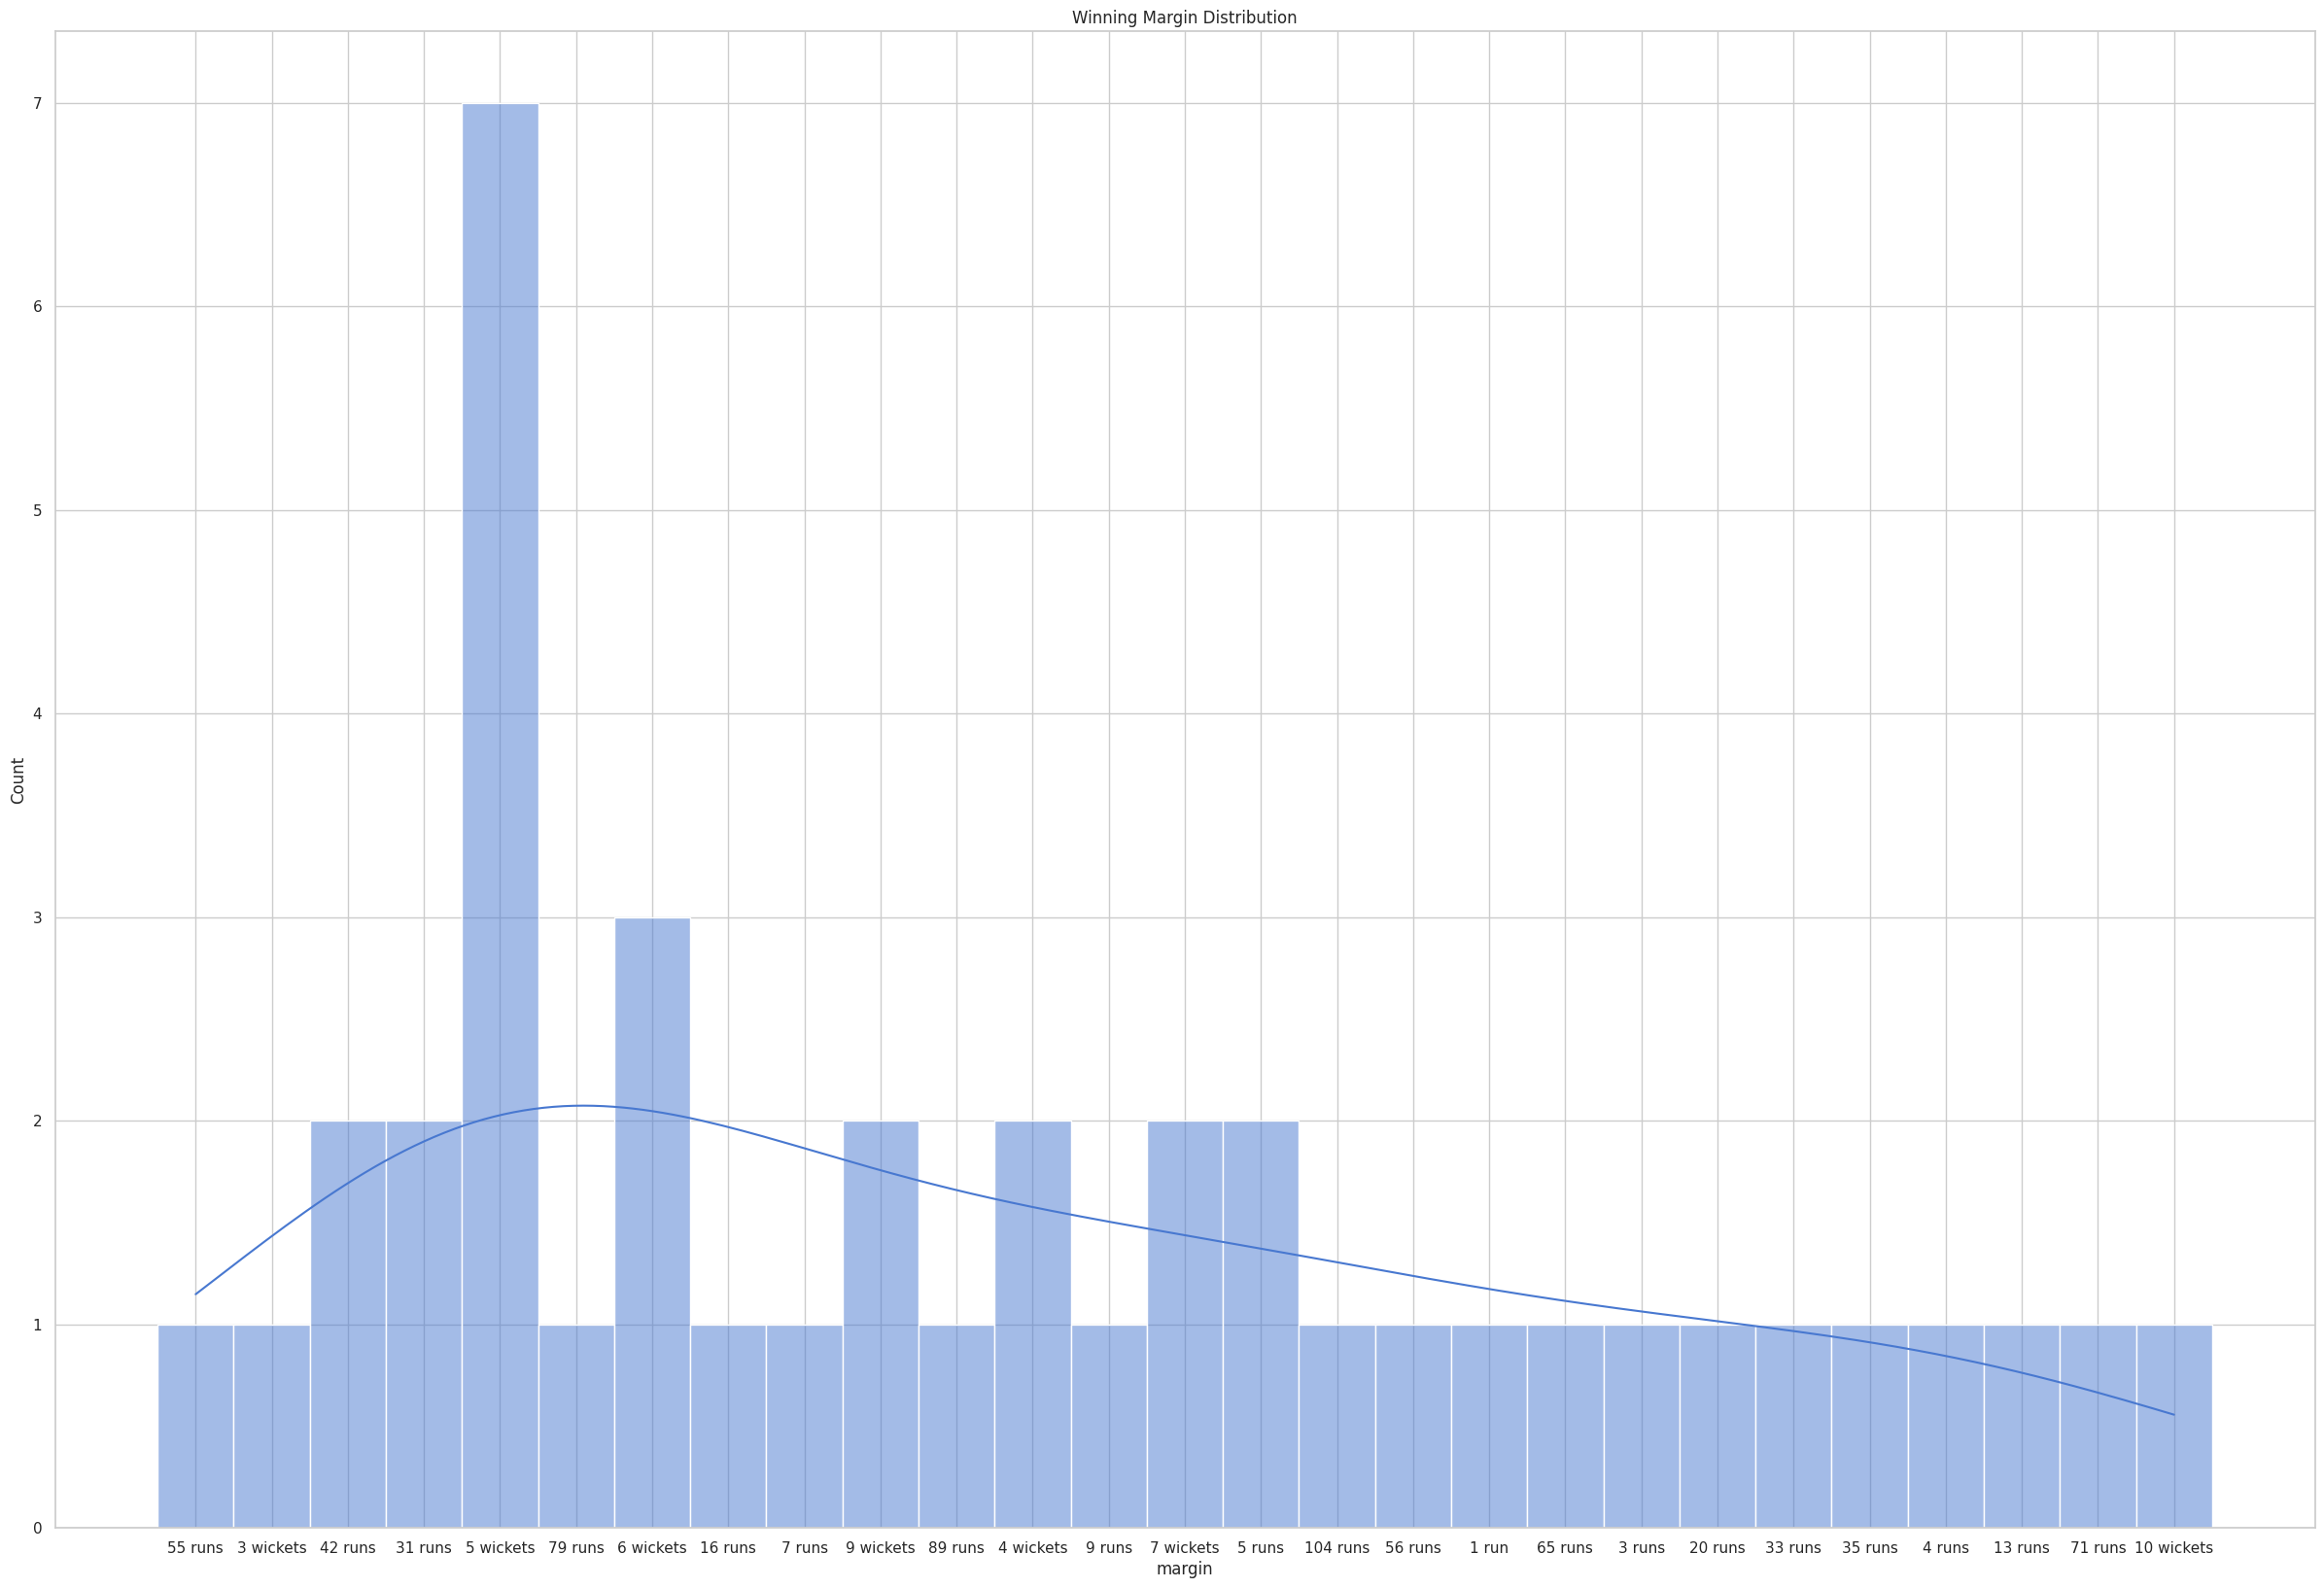

In [18]:
plt.figure(figsize=(30,20))
sns.histplot(df_match['margin'].dropna(), kde=True, bins=20)
plt.title('Winning Margin Distribution')
plt.show()


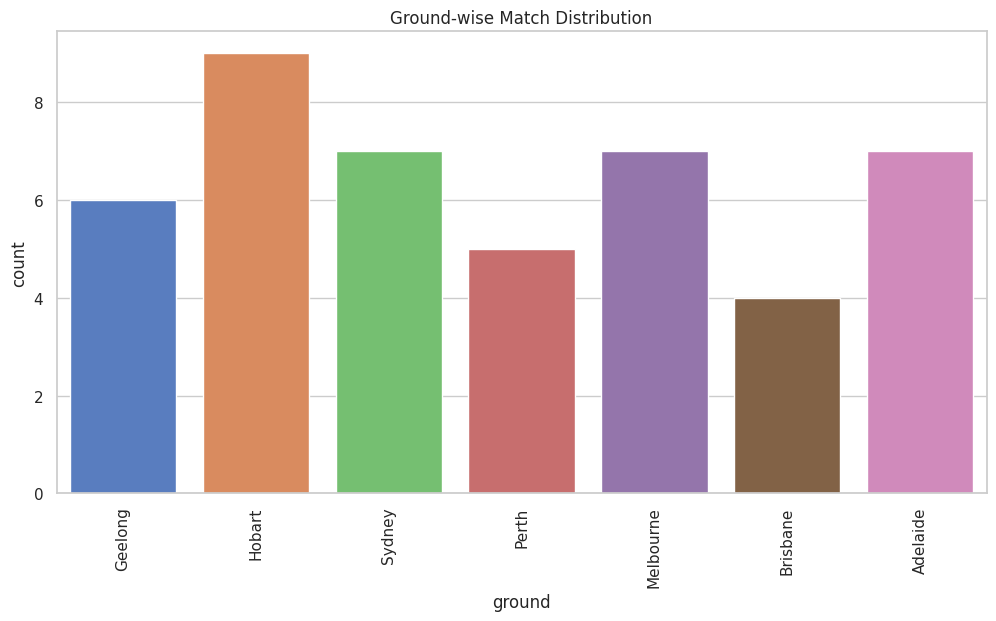

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_match, x='ground')
plt.title('Ground-wise Match Distribution')
plt.xticks(rotation=90)
plt.show()


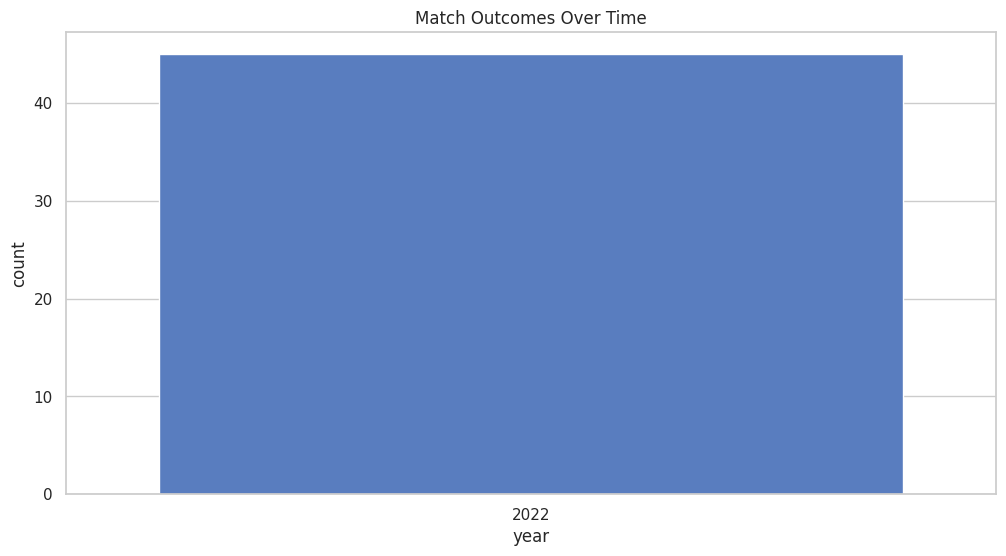

In [20]:
df_match['matchDate'] = pd.to_datetime(df_match['matchDate'])
df_match['year'] = df_match['matchDate'].dt.year
plt.figure(figsize=(12, 6))
sns.countplot(data=df_match, x='year')
plt.title('Match Outcomes Over Time')
plt.show()


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:100%; font-family:'Times New Roman'; background-color:purple; overflow:hidden"><b>Player Analysis</b></div>

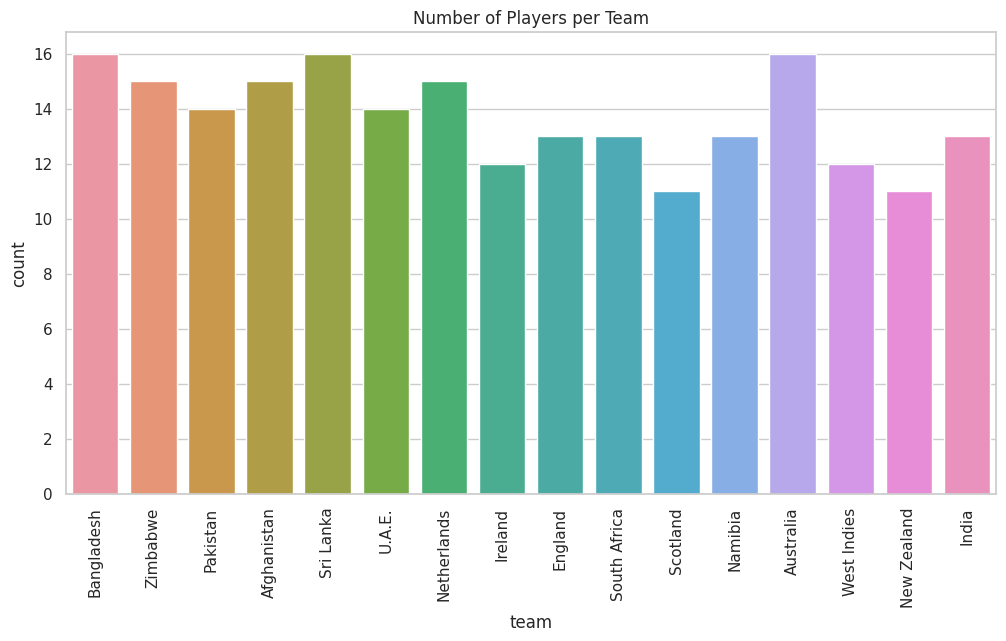

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_players, x='team')
plt.title('Number of Players per Team')
plt.xticks(rotation=90)
plt.show()

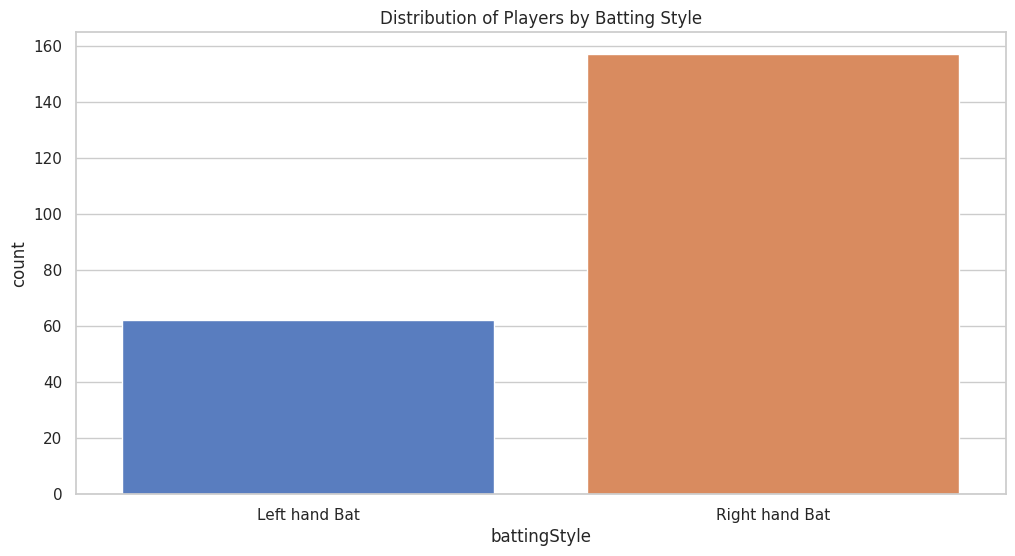

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_players, x='battingStyle')
plt.title('Distribution of Players by Batting Style')
plt.show()

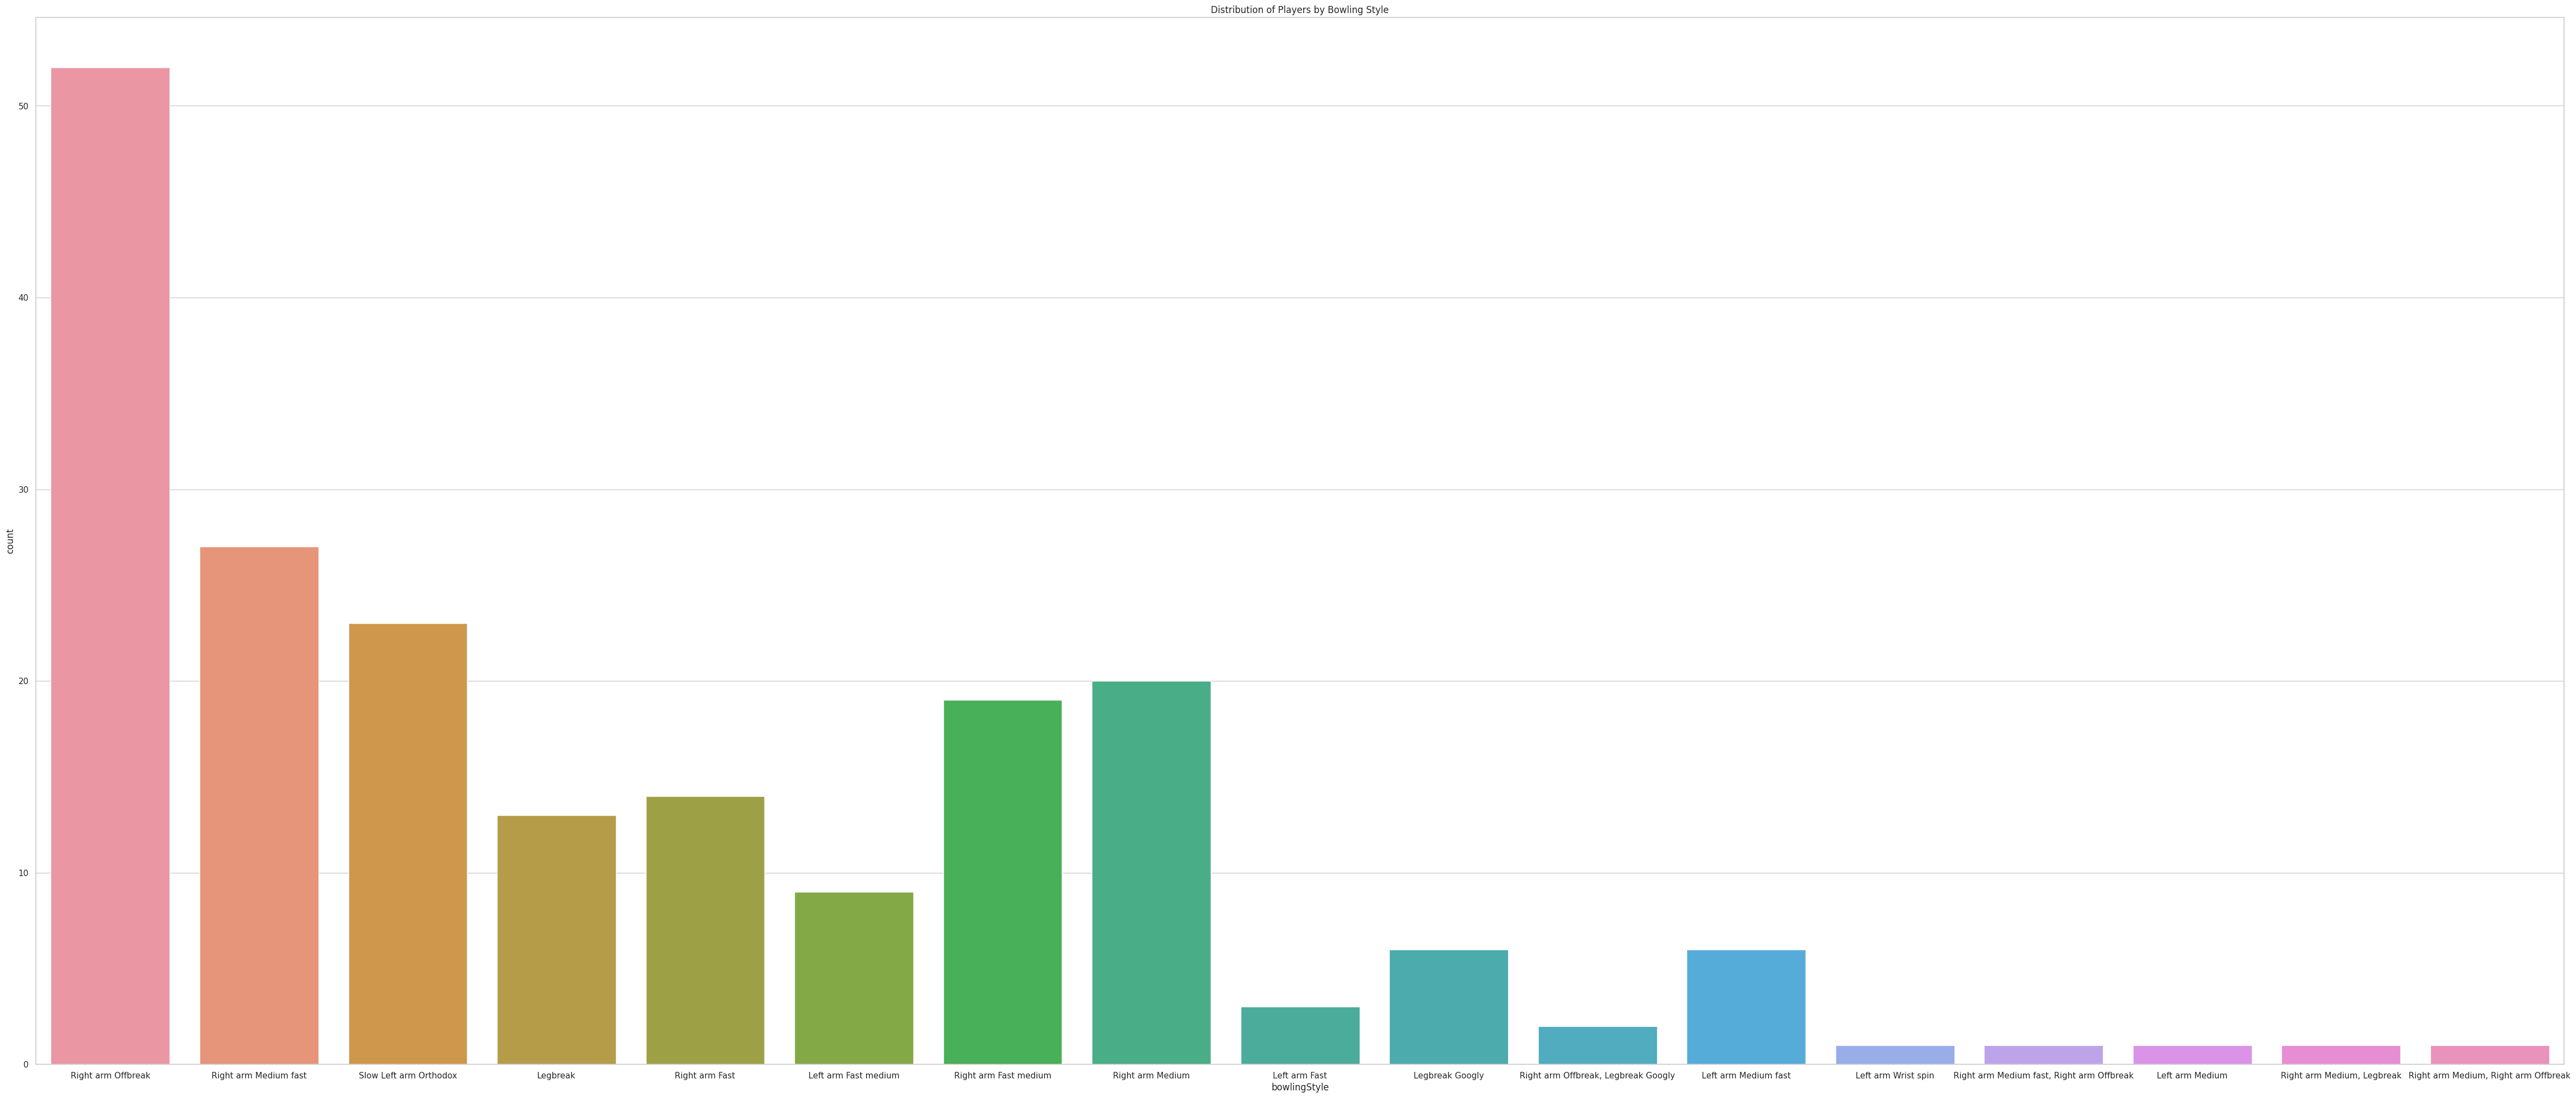

In [23]:
plt.figure(figsize=(60, 25))
sns.countplot(data=df_players, x='bowlingStyle')
plt.title('Distribution of Players by Bowling Style')
plt.show()


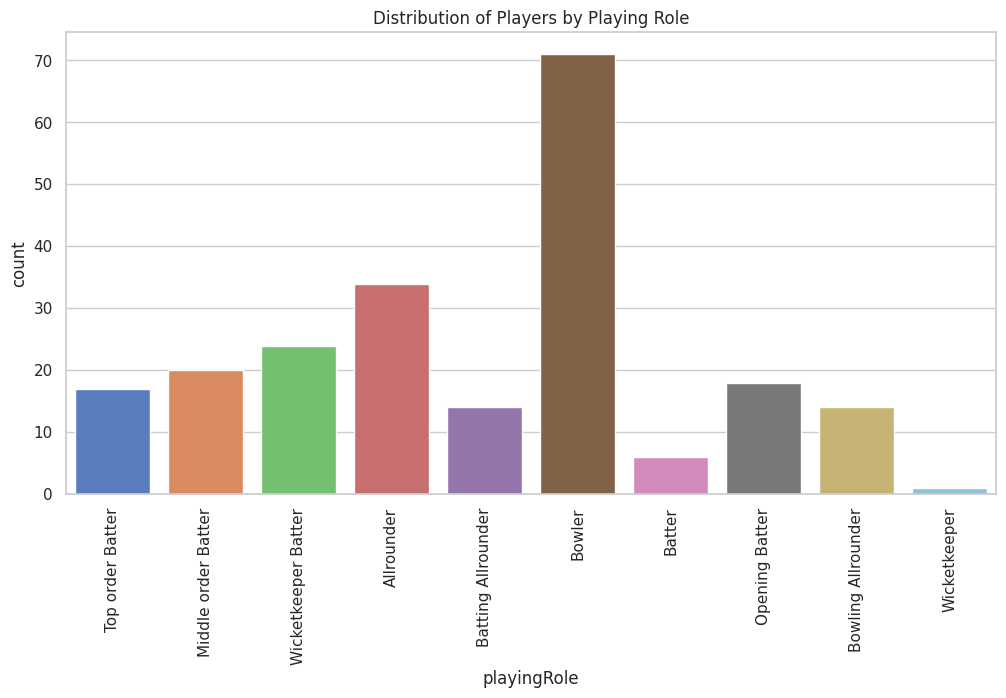

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_players, x='playingRole')
plt.title('Distribution of Players by Playing Role')
plt.xticks(rotation=90)
plt.show()

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:100%; font-family:'Times New Roman'; background-color:purple; overflow:hidden"><b>Advanced Player Performance Analysis</b></div>

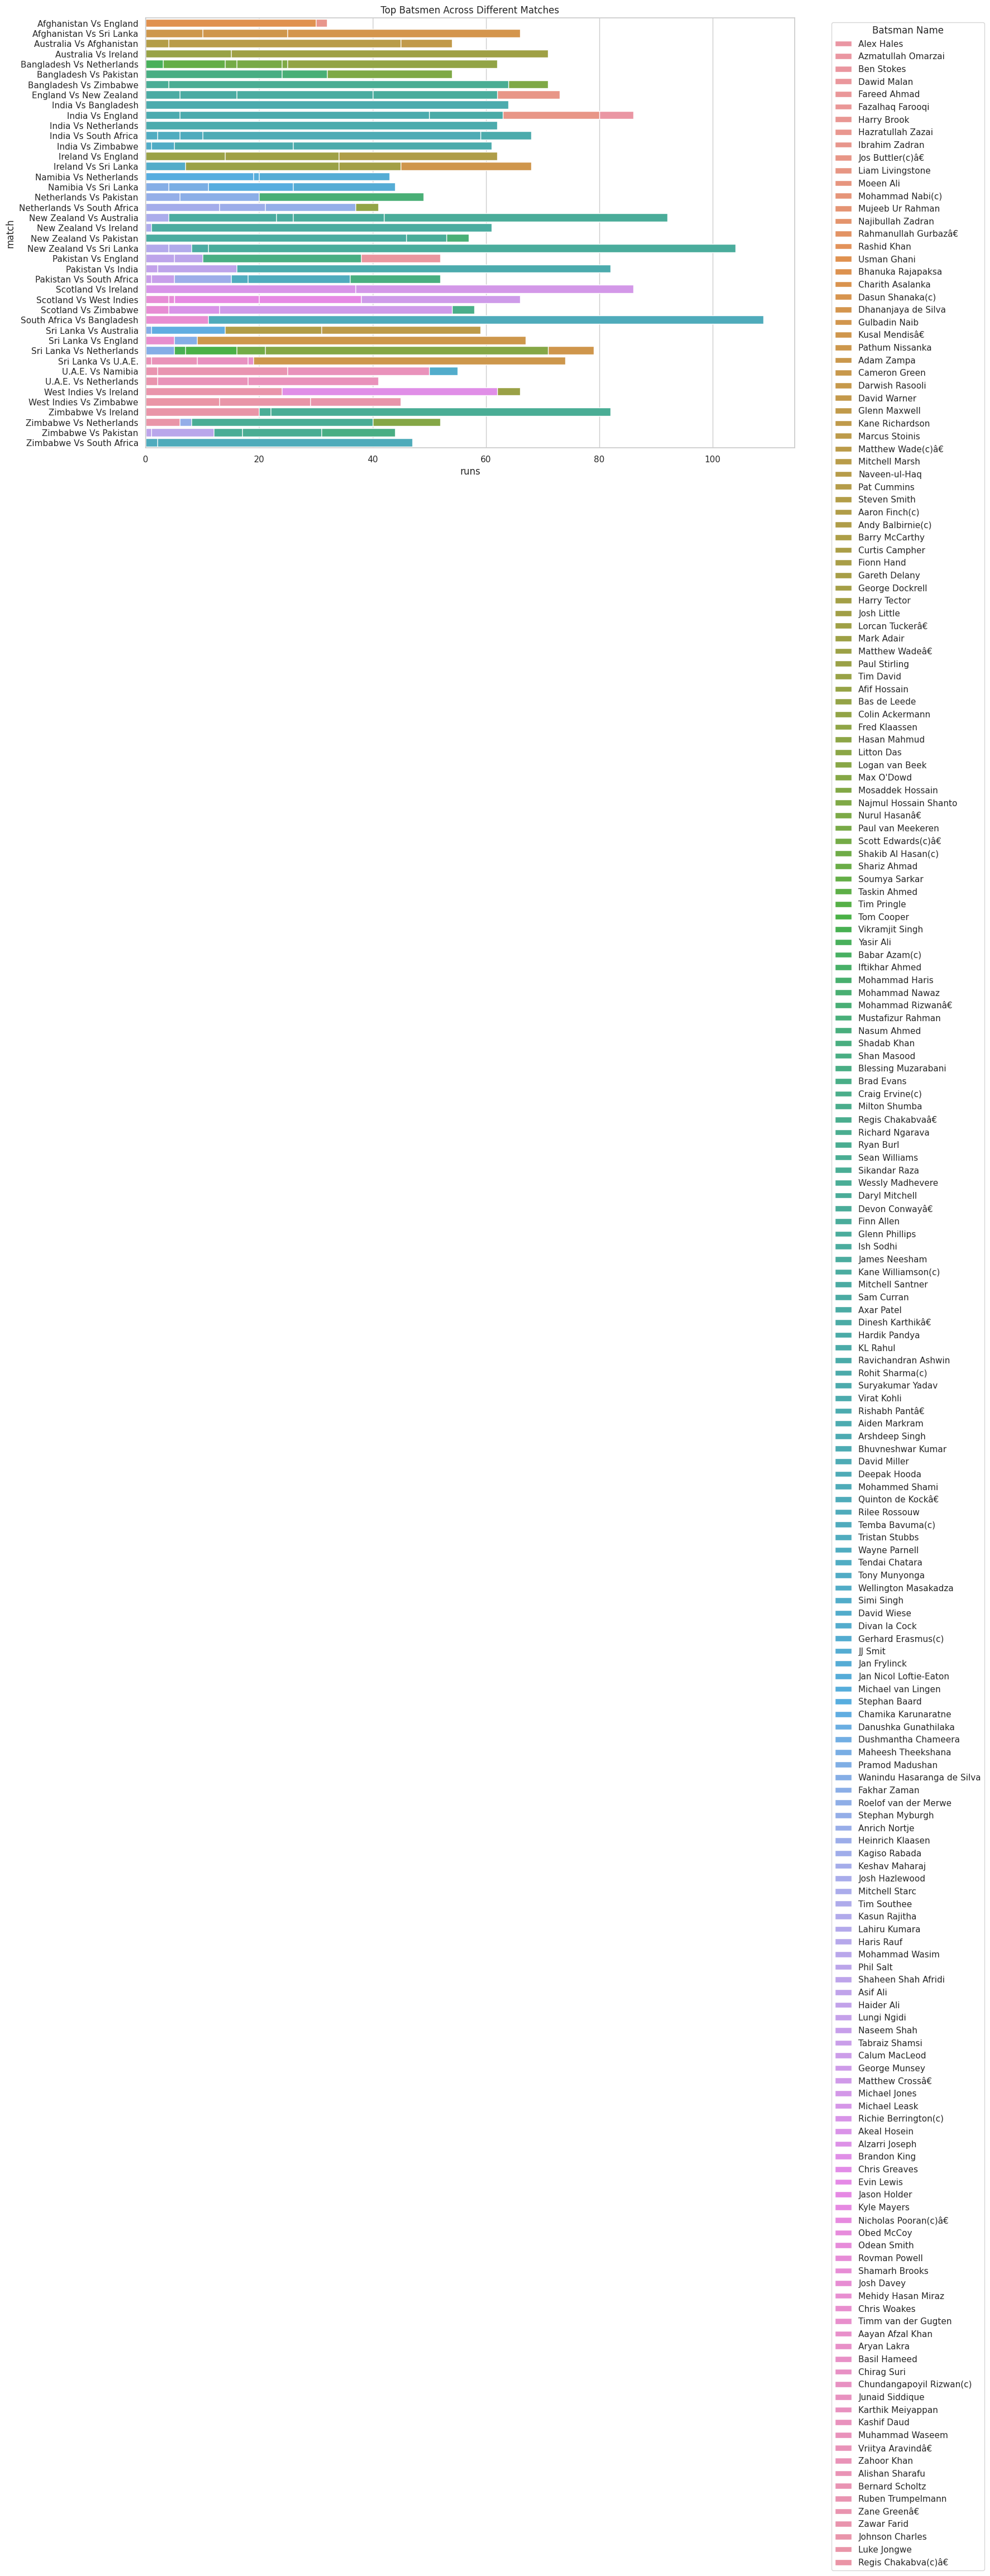

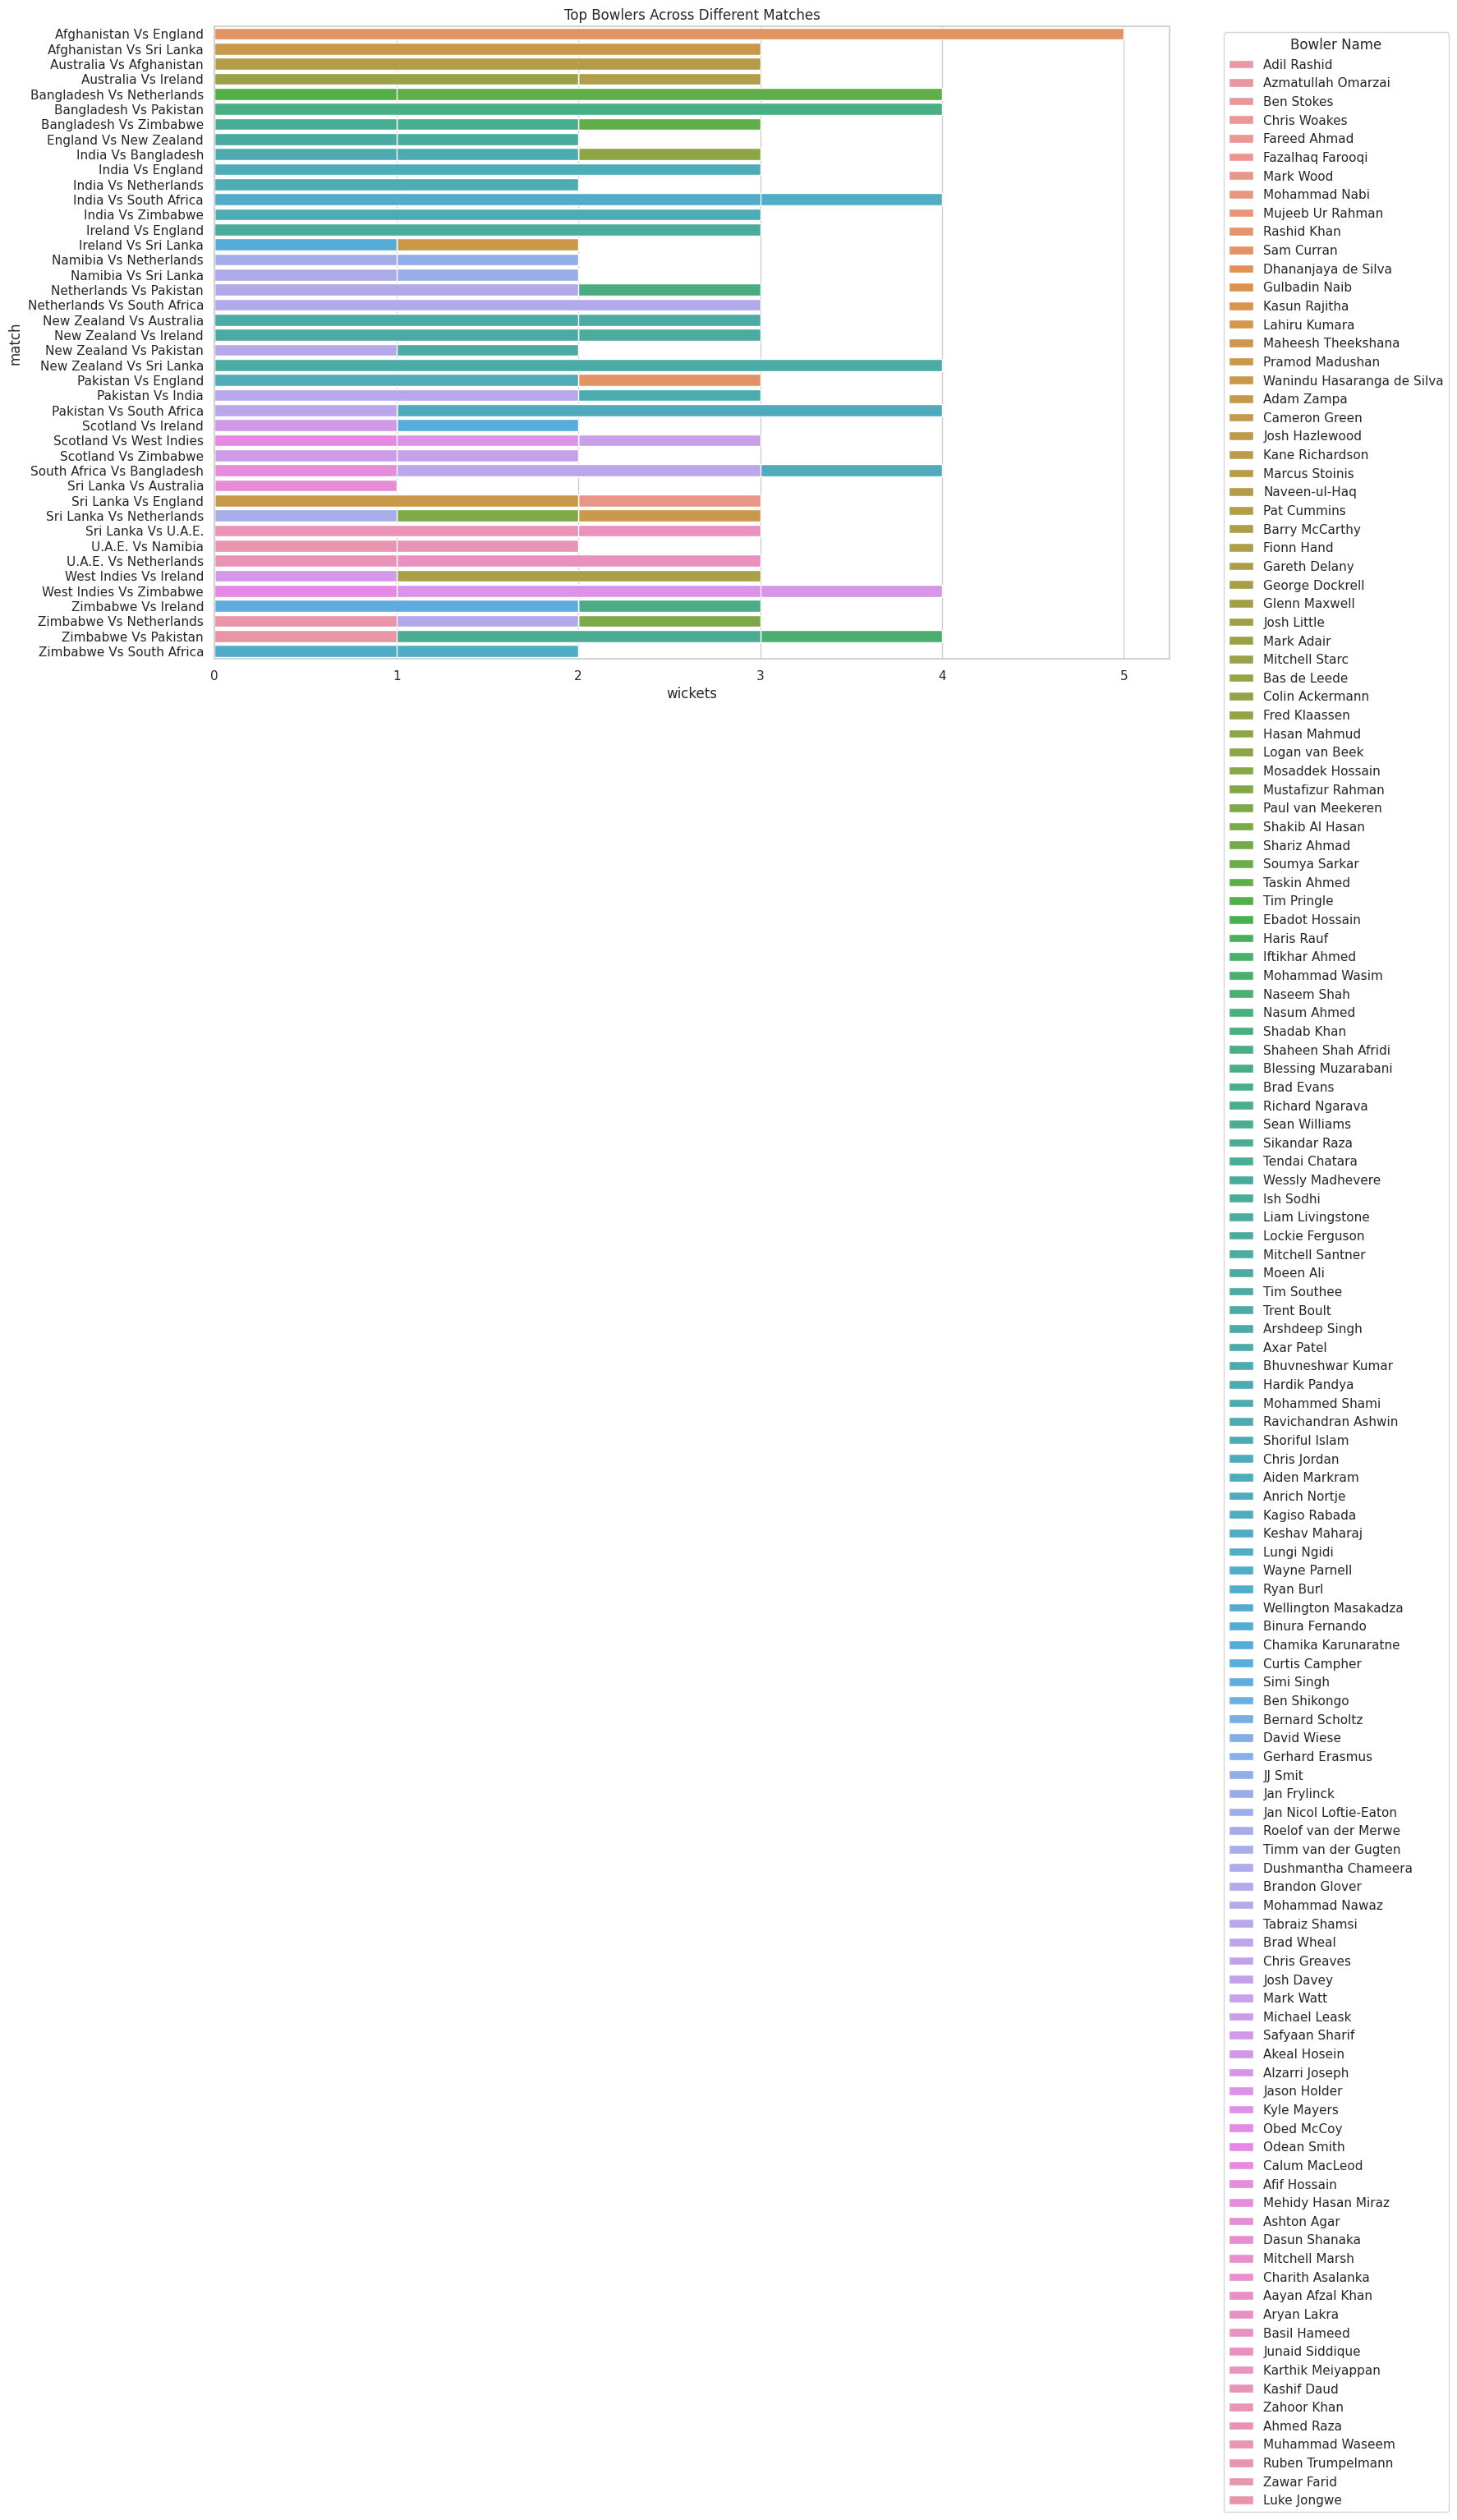

In [25]:
top_batsmen_matches = df_batting.groupby(['match', 'batsmanName'])['runs'].sum().reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(data=top_batsmen_matches, y='match', x='runs', hue='batsmanName', dodge=False)
plt.title('Top Batsmen Across Different Matches')
plt.legend(title='Batsman Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()


top_bowlers_matches = df_bowling.groupby(['match', 'bowlerName'])['wickets'].sum().reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(data=top_bowlers_matches, y='match', x='wickets', hue='bowlerName', dodge=False)
plt.title('Top Bowlers Across Different Matches')
plt.legend(title='Bowler Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:100%; font-family:'Times New Roman'; background-color:purple; overflow:hidden"><b>Team Performance Analysis</b></div>

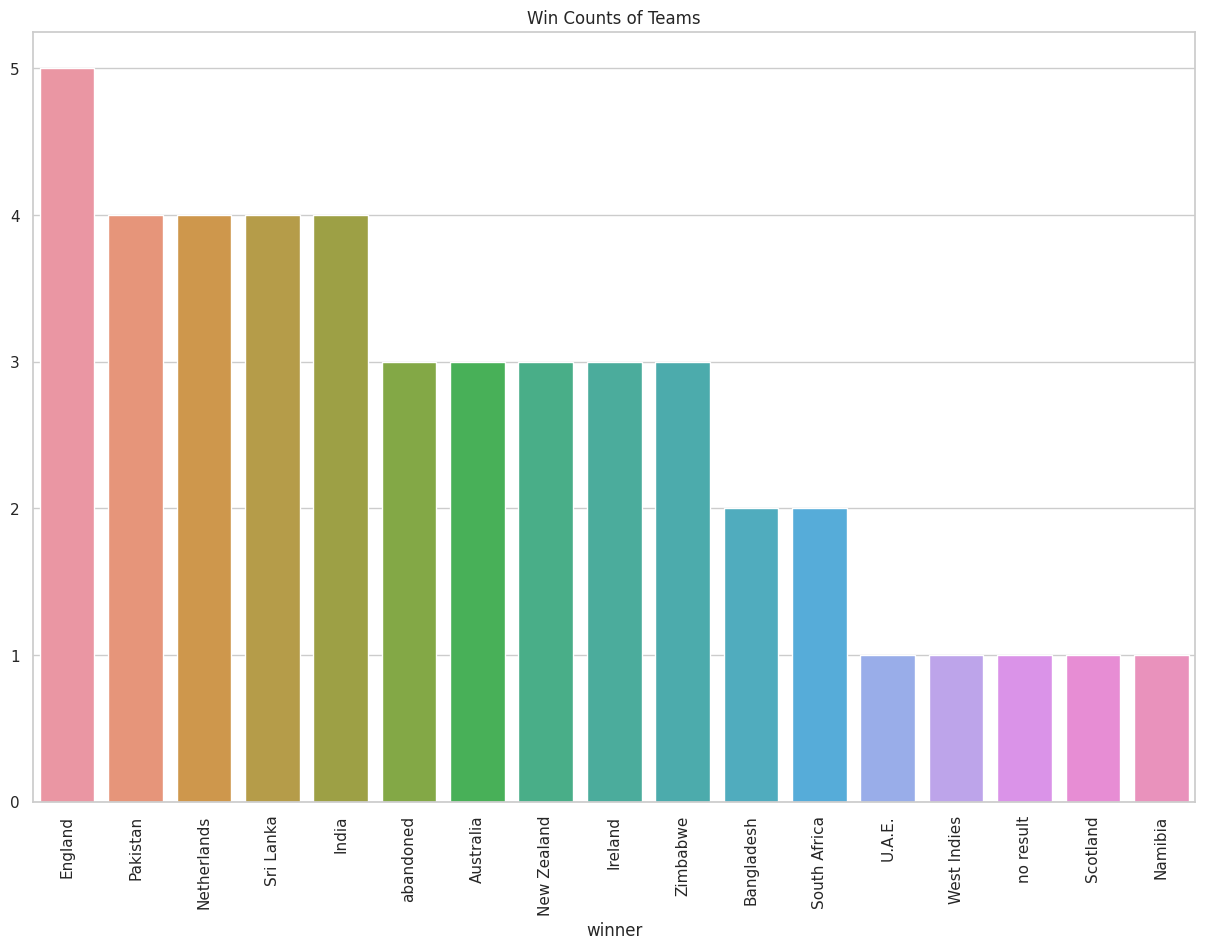

In [26]:
win_loss_counts = df_match['winner'].value_counts()
plt.figure(figsize=(15, 10))
sns.barplot(x=win_loss_counts.index, y=win_loss_counts.values)
plt.title('Win Counts of Teams')
plt.xticks(rotation=90)
plt.show()


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:100%; font-family:'Times New Roman'; background-color:purple; overflow:hidden"><b>Player Style and Role Analysis</b></div>

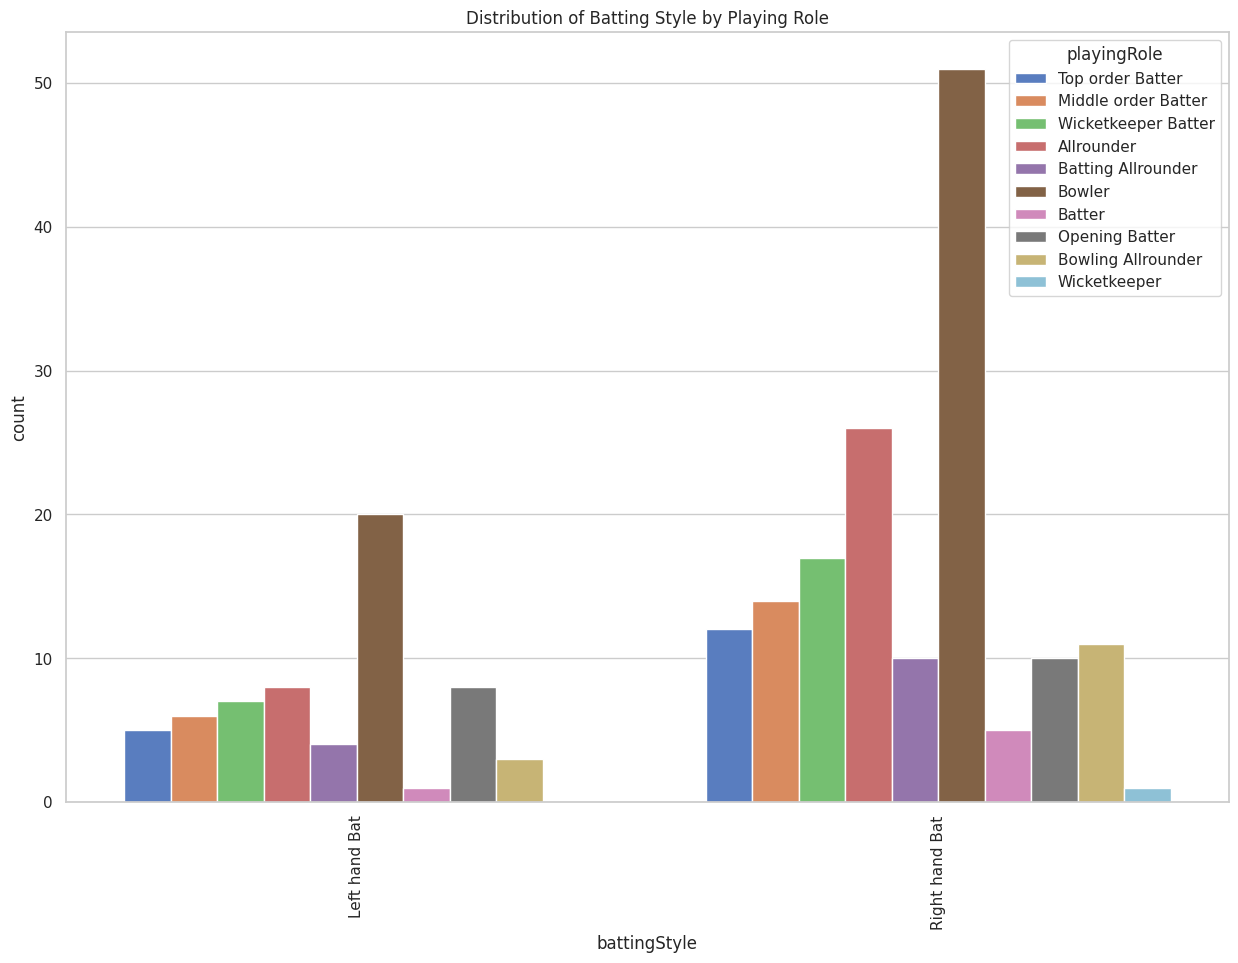

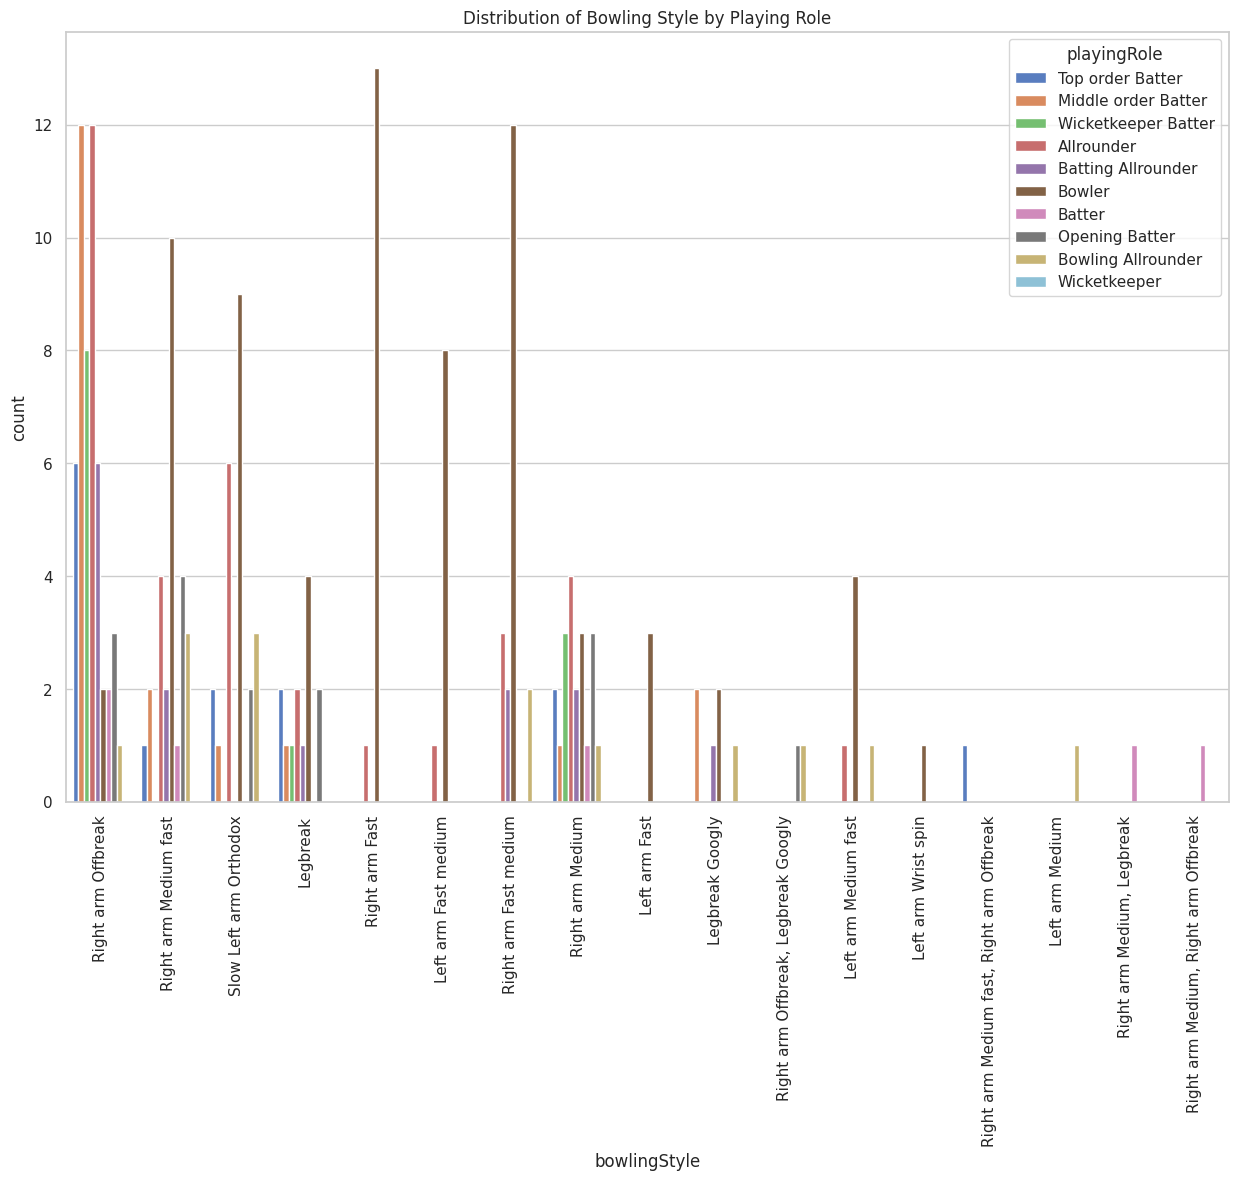

In [27]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df_players, x='battingStyle', hue='playingRole')
plt.title('Distribution of Batting Style by Playing Role')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=df_players, x='bowlingStyle', hue='playingRole')
plt.title('Distribution of Bowling Style by Playing Role')
plt.xticks(rotation=90)
plt.show()


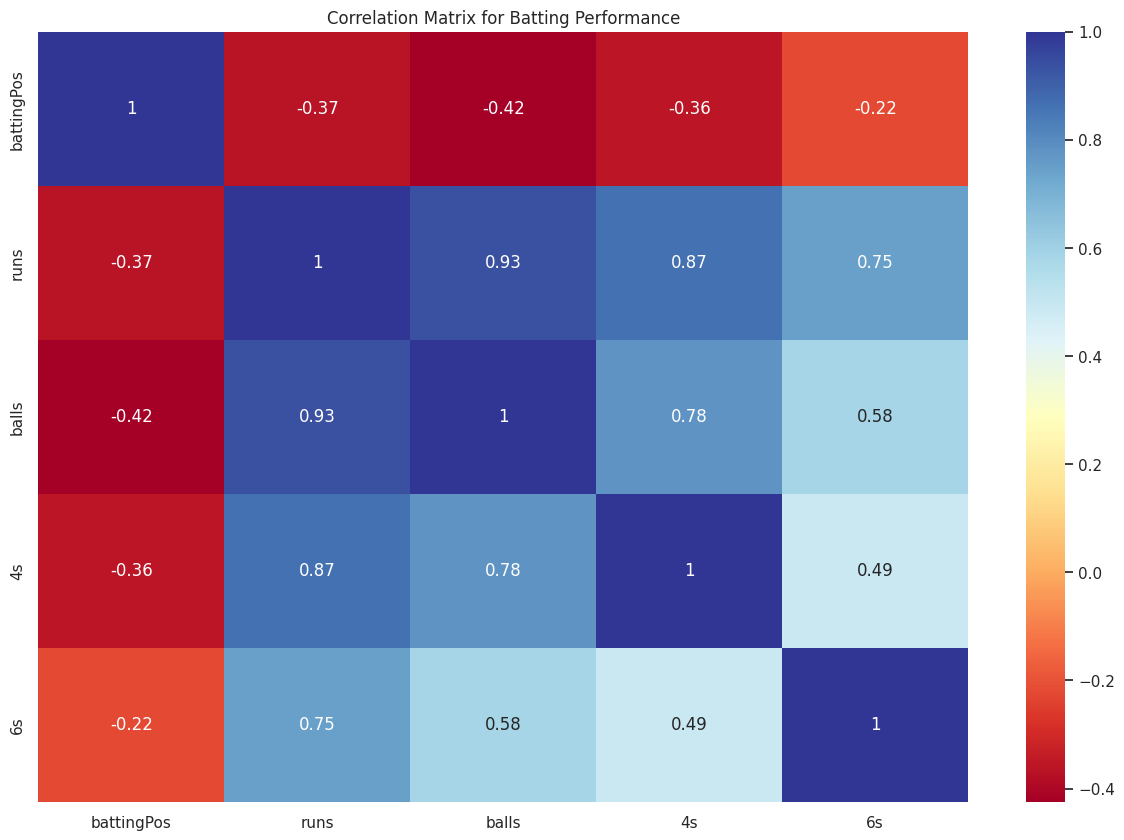

In [28]:
numeric_df_batting = df_batting.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df_batting.corr(), annot=True, cmap='RdYlBu')
plt.title('Correlation Matrix for Batting Performance')
plt.show()


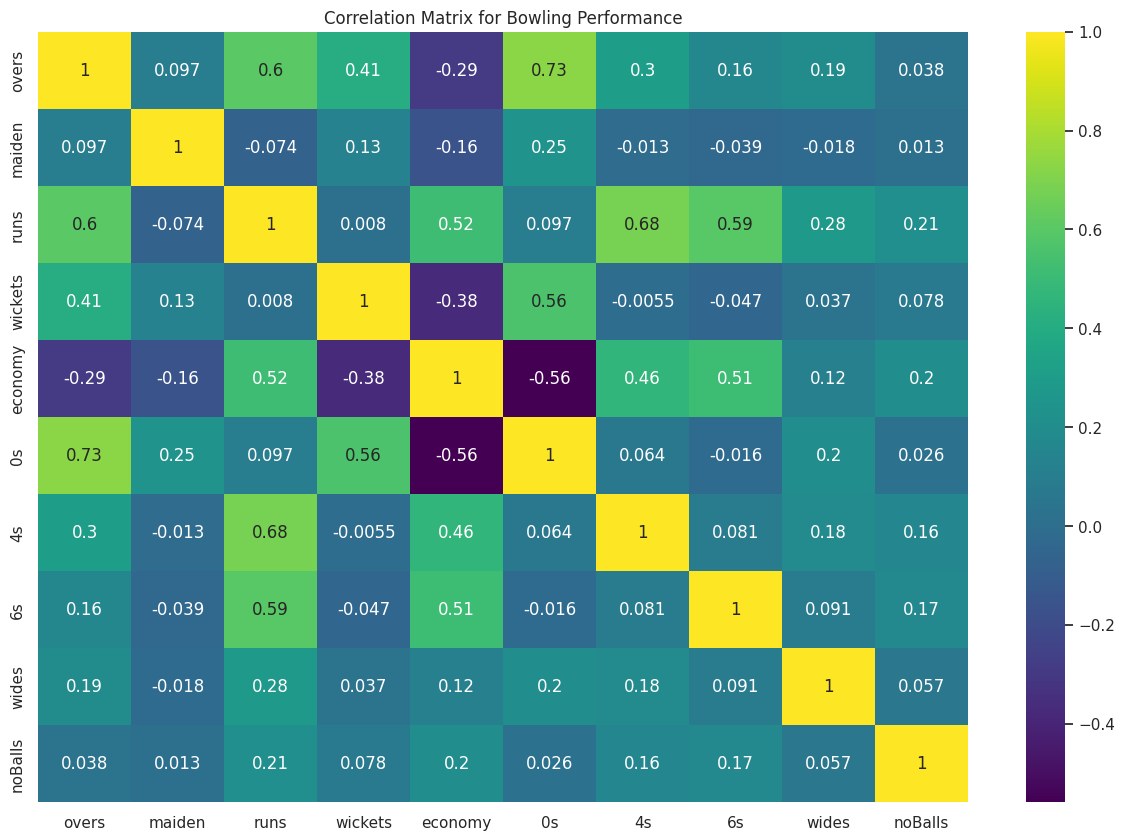

In [29]:
numeric_df_bowling = df_bowling.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df_bowling.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix for Bowling Performance')
plt.show()


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:100%; font-family:'Times New Roman'; background-color:purple; overflow:hidden"><b>Conclusion</b></div>
<p style="font-size: 16px; text-align: justify; padding: 10px;">
    The analysis highlights key player performances critical for IPL bidding strategies. Virat Kohli stands out as the top batsman with significant runs, followed closely by Max O'Dowd and Suryakumar Yadav, making them valuable assets for any franchise. Bowlers like Wanindu Hasaranga de Silva and Bas de Leede, known for their wicket-taking abilities, also emerge as strong contenders for bids. The distribution of players reveals a greater number of right-arm fast bowlers, medium pacers, and left-arm fast bowlers, along with all-rounders, indicating their importance in team composition. Focusing on high-performing batsmen and bowlers, particularly those with varied bowling styles, is essential for successful IPL bidding strategies.
</p>


<div style="background-color: #ADD8E6; padding: 10px; border-radius: 6px; box-shadow: 2px 2px 8px rgba(0, 0, 0, 0.5);">
    <p style="font-size: 16px; text-align: center; color: #333; margin: 0;">
        If you liked my notebook or found the analysis helpful, Please upvote if you like!
    </p>
</div>
